**TELECOM CHURN CASE STUDY BY K PAVAN KUMAR, SACHIN SEN, NAVEEN VISHWAKARMA**

In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, confusion_matrix,precision_recall_curve
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Data Exploration:

In [288]:
telecom=pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [289]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [290]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [291]:
telecom.shape

(99999, 226)

### Data Cleaning:

#### Checking for NaN values in each columns:

In [292]:
col=telecom.columns

In [293]:
for i in col:
    print(i,round(sum(telecom[i].isnull())/len(telecom[i])*100,2),"%")

mobile_number 0.0 %
circle_id 0.0 %
loc_og_t2o_mou 1.02 %
std_og_t2o_mou 1.02 %
loc_ic_t2o_mou 1.02 %
last_date_of_month_6 0.0 %
last_date_of_month_7 0.6 %
last_date_of_month_8 1.1 %
last_date_of_month_9 1.66 %
arpu_6 0.0 %
arpu_7 0.0 %
arpu_8 0.0 %
arpu_9 0.0 %
onnet_mou_6 3.94 %
onnet_mou_7 3.86 %
onnet_mou_8 5.38 %
onnet_mou_9 7.75 %
offnet_mou_6 3.94 %
offnet_mou_7 3.86 %
offnet_mou_8 5.38 %
offnet_mou_9 7.75 %
roam_ic_mou_6 3.94 %
roam_ic_mou_7 3.86 %
roam_ic_mou_8 5.38 %
roam_ic_mou_9 7.75 %
roam_og_mou_6 3.94 %
roam_og_mou_7 3.86 %
roam_og_mou_8 5.38 %
roam_og_mou_9 7.75 %
loc_og_t2t_mou_6 3.94 %
loc_og_t2t_mou_7 3.86 %
loc_og_t2t_mou_8 5.38 %
loc_og_t2t_mou_9 7.75 %
loc_og_t2m_mou_6 3.94 %
loc_og_t2m_mou_7 3.86 %
loc_og_t2m_mou_8 5.38 %
loc_og_t2m_mou_9 7.75 %
loc_og_t2f_mou_6 3.94 %
loc_og_t2f_mou_7 3.86 %
loc_og_t2f_mou_8 5.38 %
loc_og_t2f_mou_9 7.75 %
loc_og_t2c_mou_6 3.94 %
loc_og_t2c_mou_7 3.86 %
loc_og_t2c_mou_8 5.38 %
loc_og_t2c_mou_9 7.75 %
loc_og_mou_6 3.94 %
loc_og_mo

In [294]:
## Filtering columns with more than 40 % null values
telecomnull=pd.DataFrame(round(telecom.isnull().sum()/len(telecom)*100,2).sort_values(ascending=False))
telecomnull.columns=["percentage_null"]
telecomnull
telecomnull[telecomnull.percentage_null>=40]

,percentage_null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


In [295]:
# Info about columns with more than 40% null values
telecom[telecomnull[telecomnull.percentage_null>=40].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   arpu_3g_6                 25153 non-null  float64
 1   night_pck_user_6          25153 non-null  float64
 2   total_rech_data_6         25153 non-null  float64
 3   arpu_2g_6                 25153 non-null  float64
 4   max_rech_data_6           25153 non-null  float64
 5   fb_user_6                 25153 non-null  float64
 6   av_rech_amt_data_6        25153 non-null  float64
 7   date_of_last_rech_data_6  25153 non-null  object 
 8   count_rech_2g_6           25153 non-null  float64
 9   count_rech_3g_6           25153 non-null  float64
 10  date_of_last_rech_data_7  25571 non-null  object 
 11  total_rech_data_7         25571 non-null  float64
 12  fb_user_7                 25571 non-null  float64
 13  max_rech_data_7           25571 non-null  float64
 14  night_

- Dropping the columns who have greater than or equal to 40 % missing values.

In [296]:
telecom=telecom.drop(telecomnull[telecomnull.percentage_null>=40].index, axis=1)
telecom.shape

(99999, 186)

In [297]:
# Checking for null percentage in updated data frame
telecomnull1=pd.DataFrame(round(telecom.isnull().sum()/len(telecom)*100,2).sort_values(ascending=False))
telecomnull1.columns=["percent_null"]
telecomnull1

,percent_null
loc_og_t2m_mou_9,7.75
loc_ic_t2m_mou_9,7.75
offnet_mou_9,7.75
std_ic_t2f_mou_9,7.75
roam_ic_mou_9,7.75
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


In [298]:
#Checking for object columns in telecom dataframe
telecom.select_dtypes(exclude='object').columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=178)

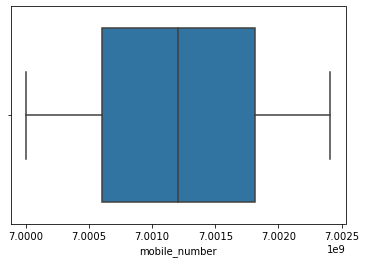

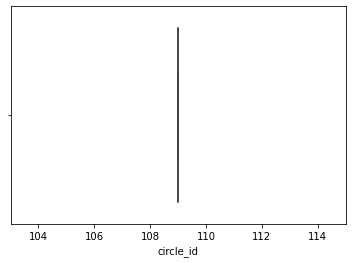

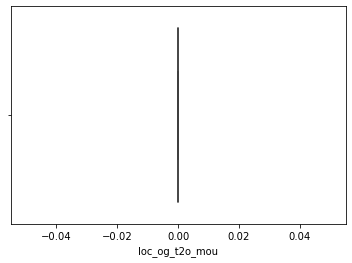

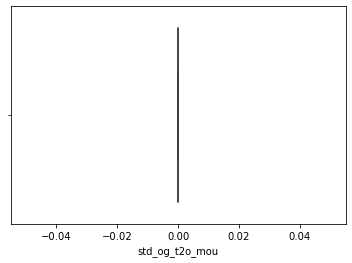

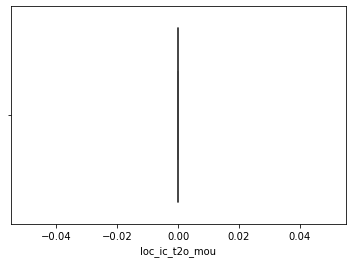

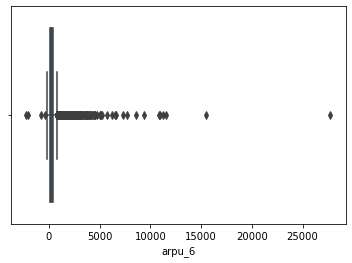

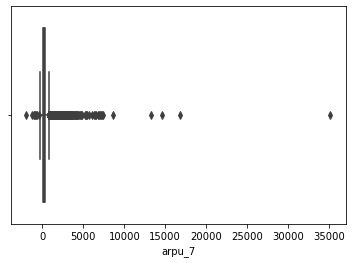

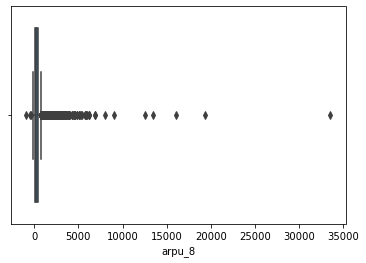

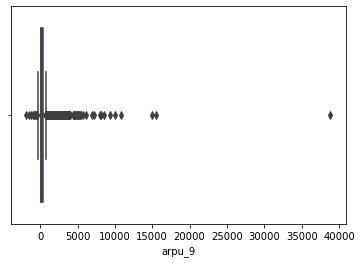

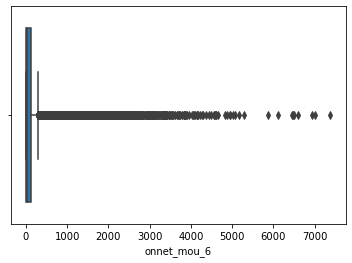

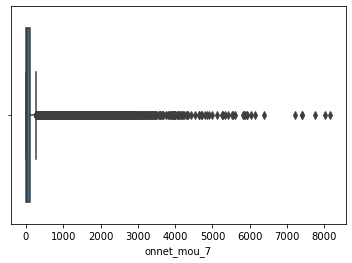

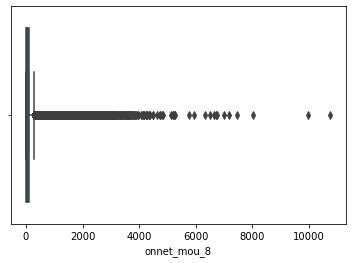

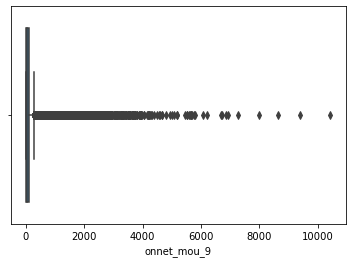

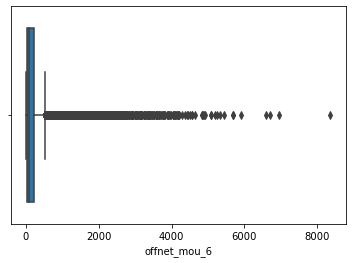

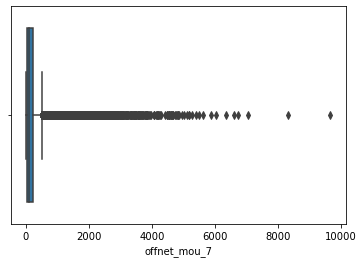

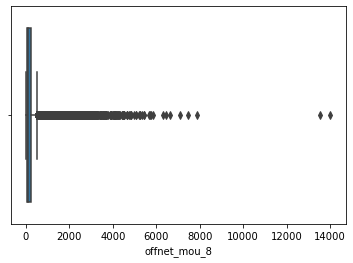

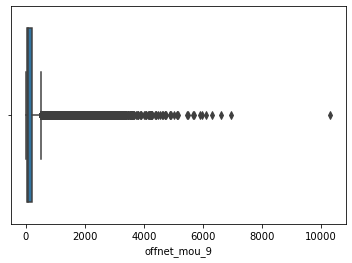

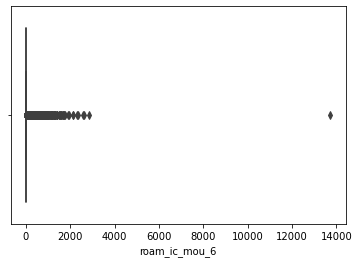

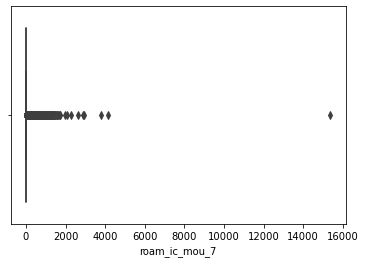

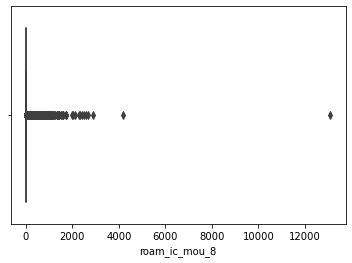

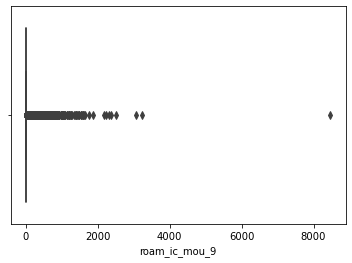

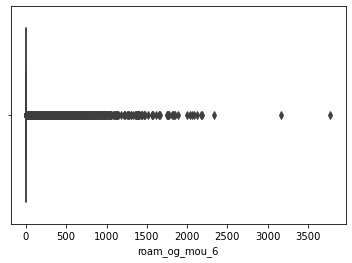

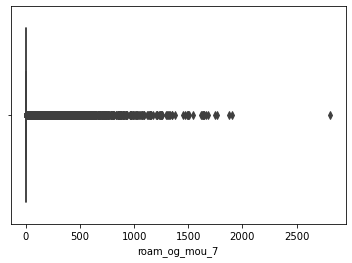

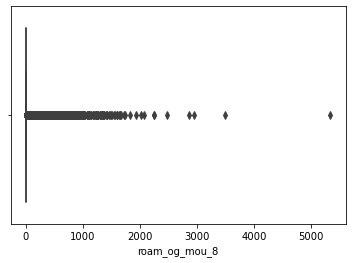

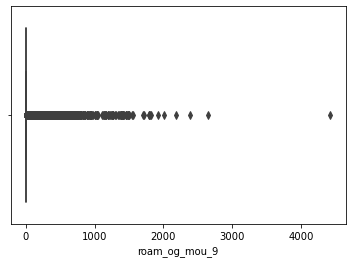

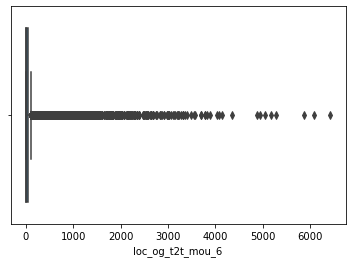

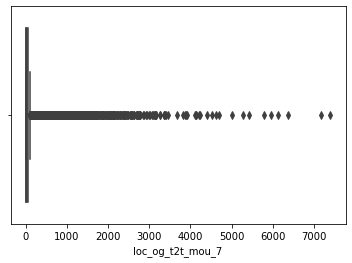

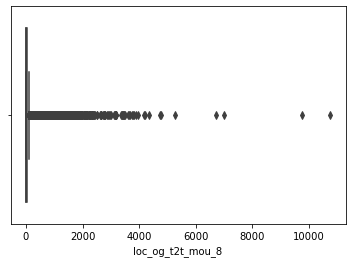

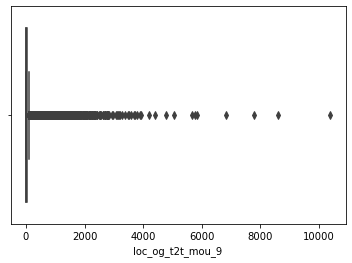

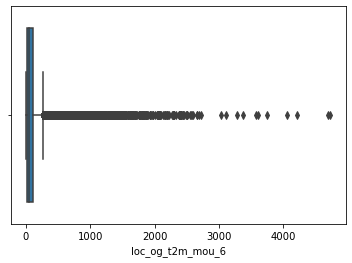

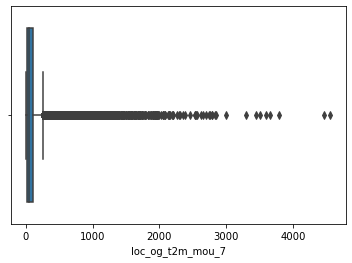

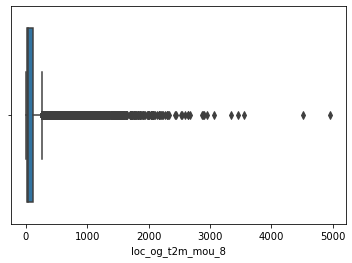

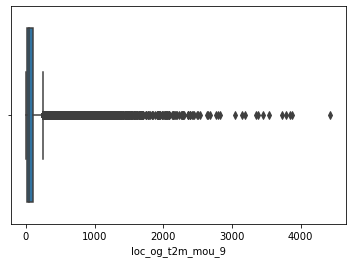

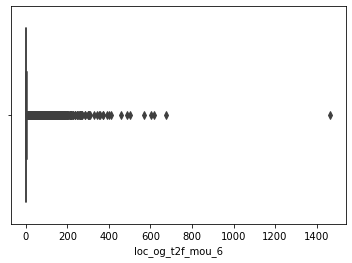

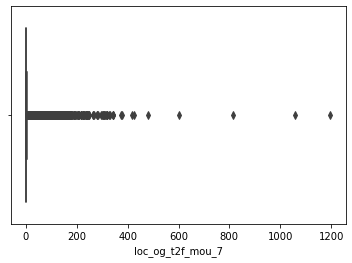

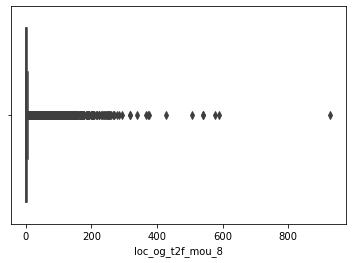

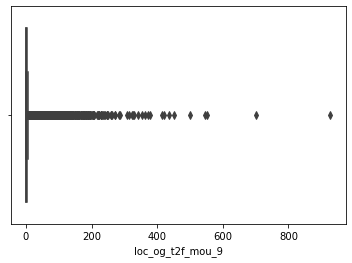

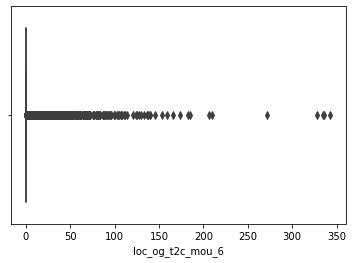

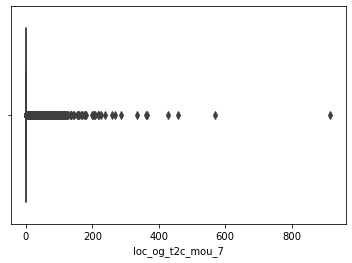

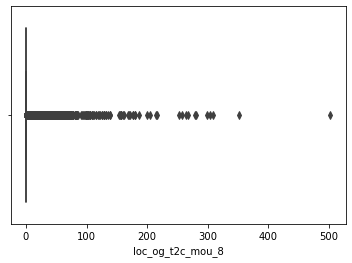

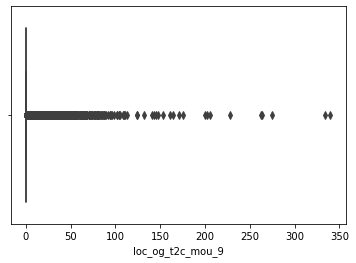

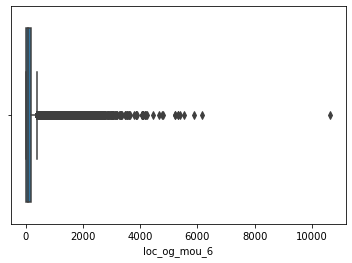

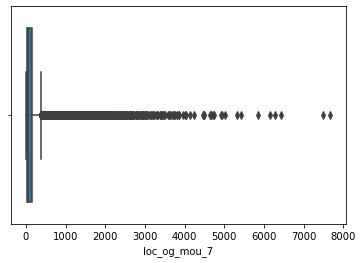

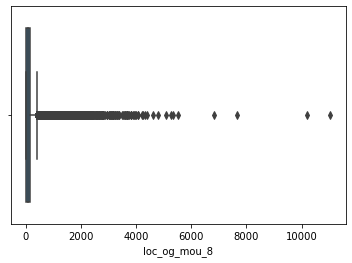

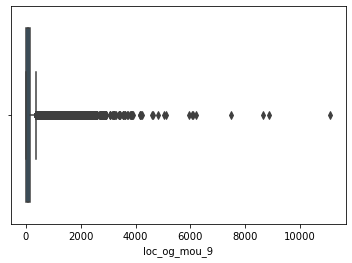

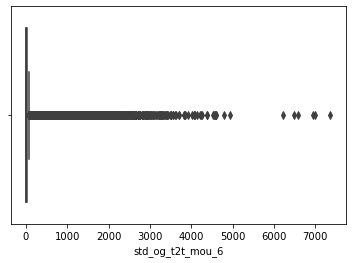

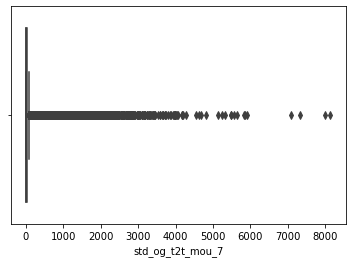

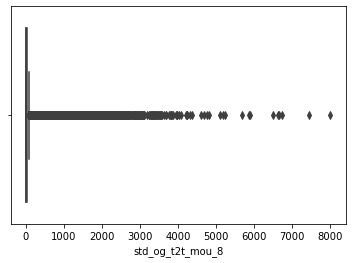

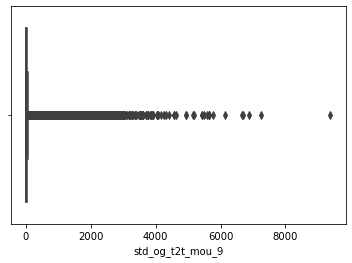

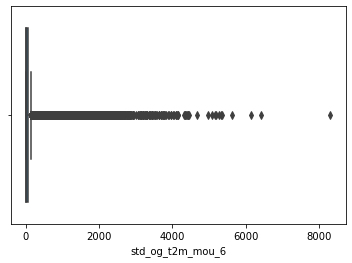

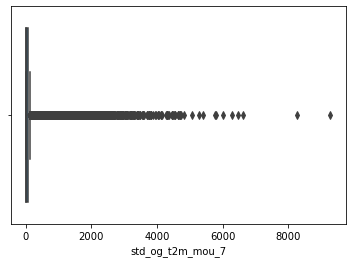

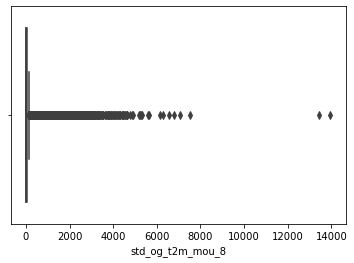

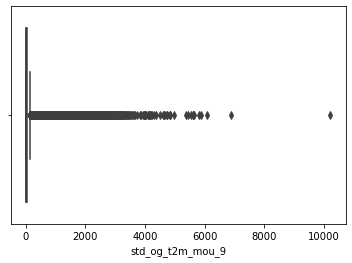

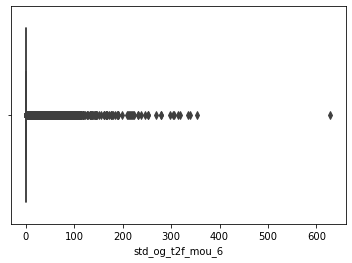

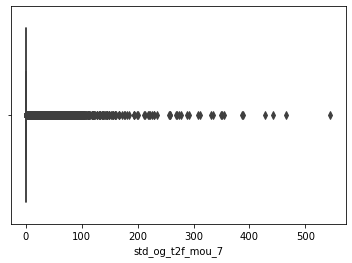

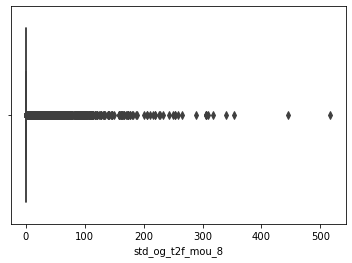

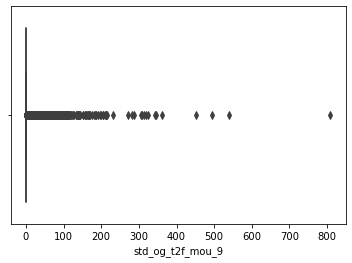

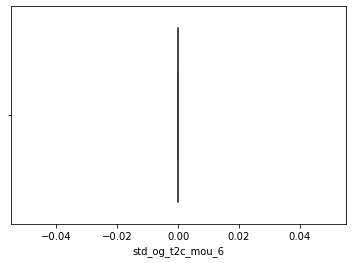

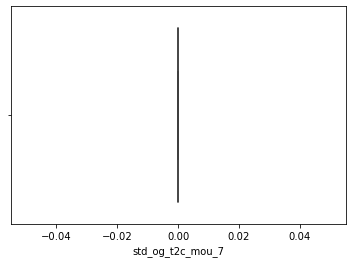

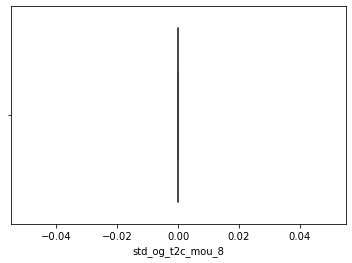

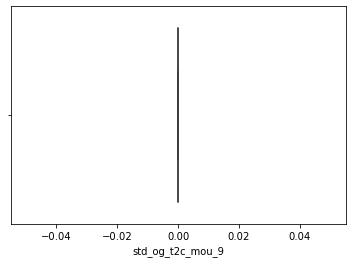

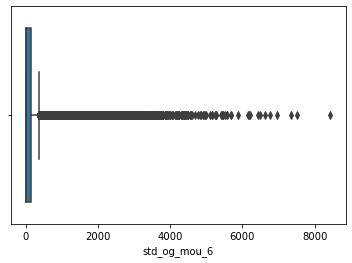

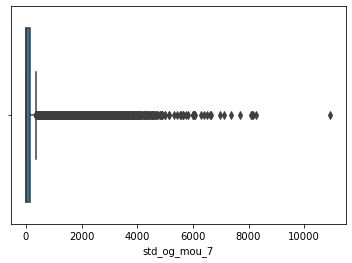

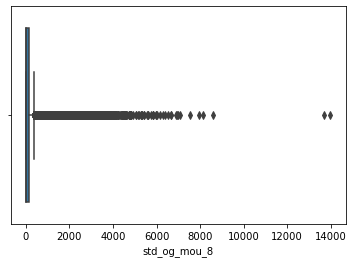

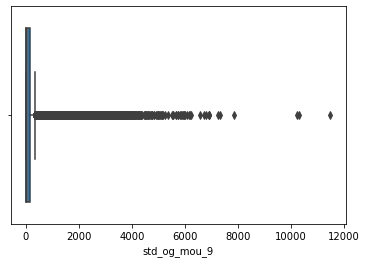

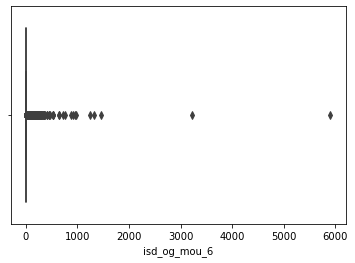

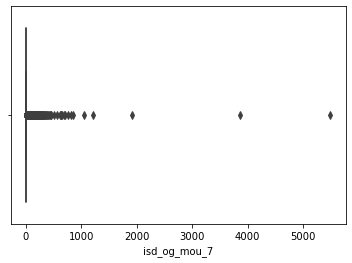

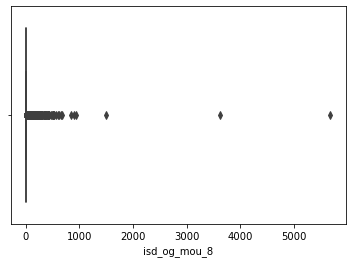

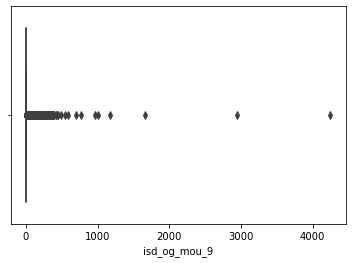

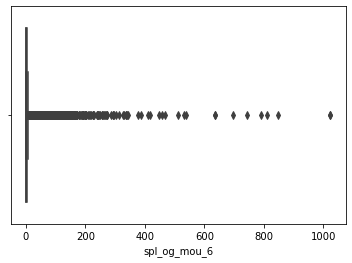

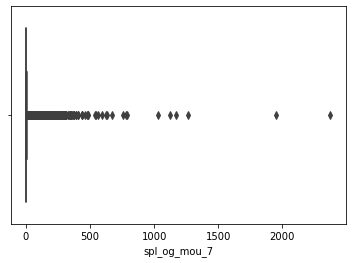

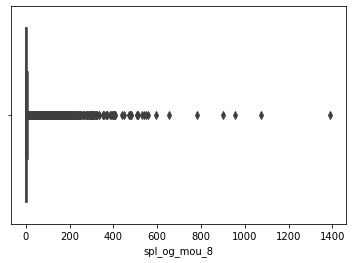

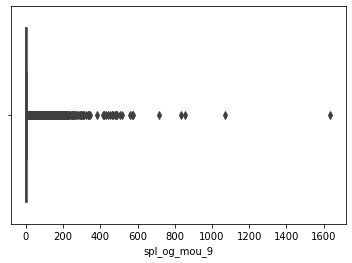

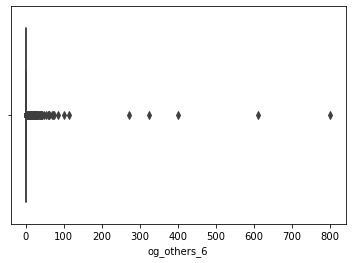

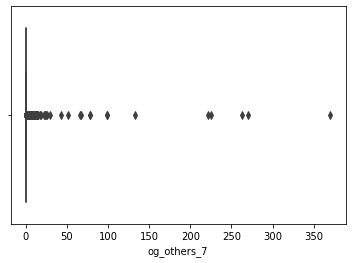

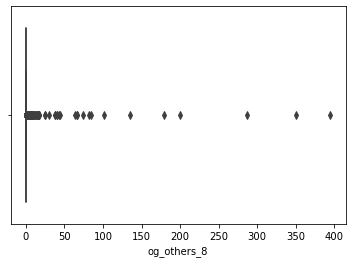

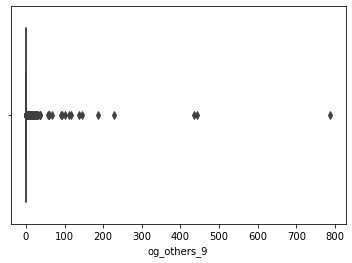

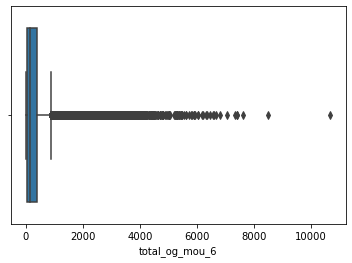

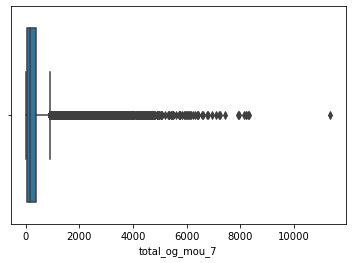

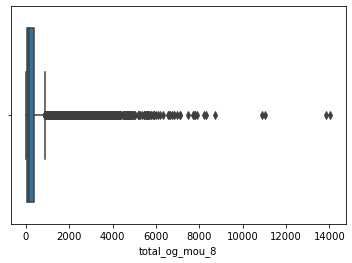

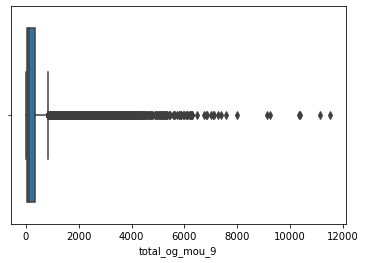

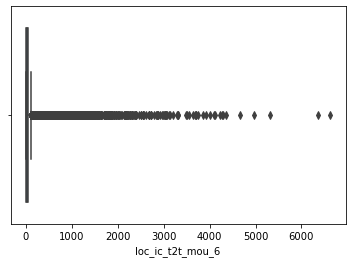

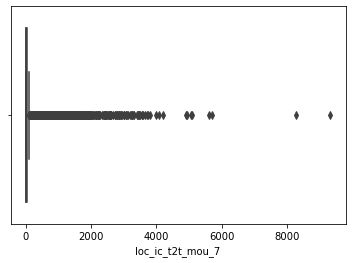

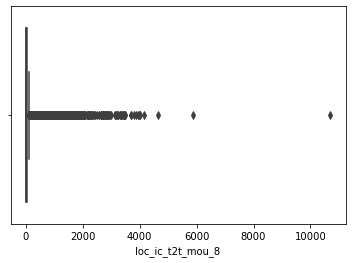

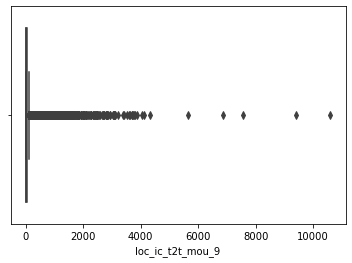

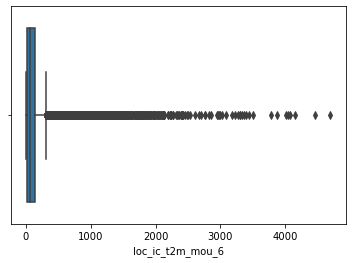

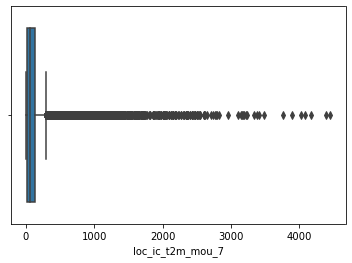

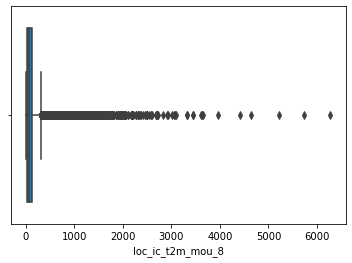

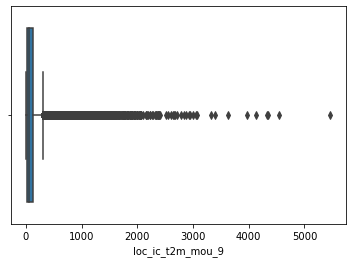

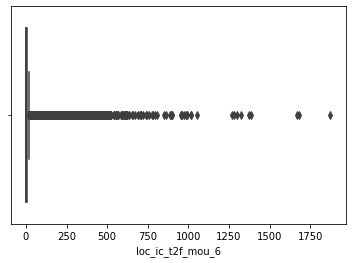

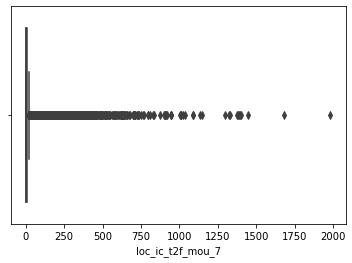

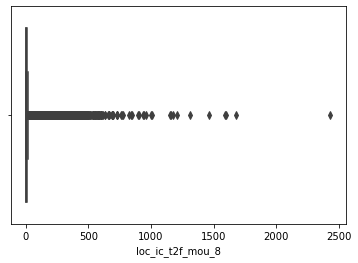

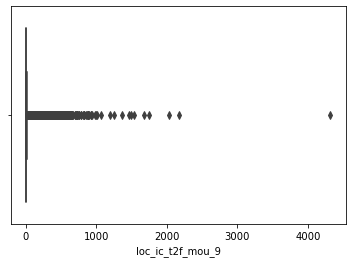

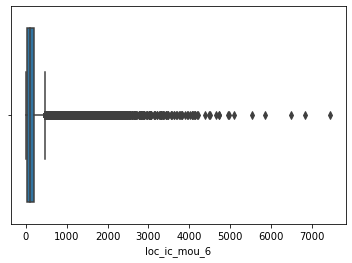

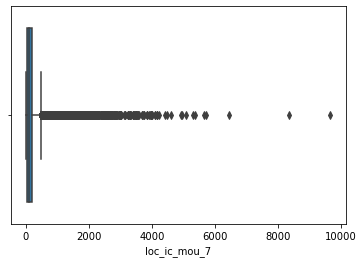

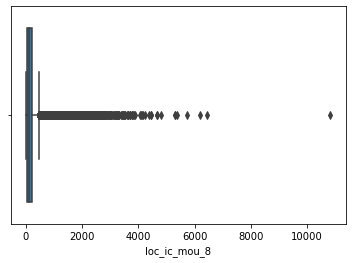

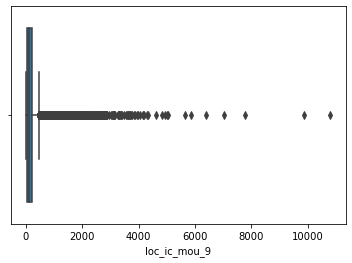

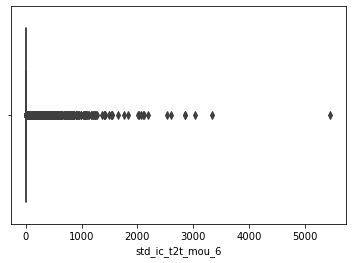

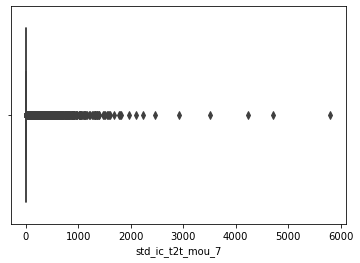

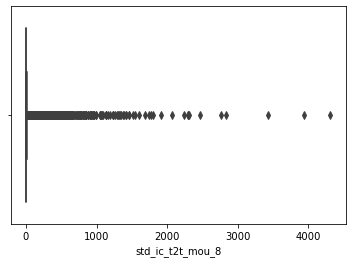

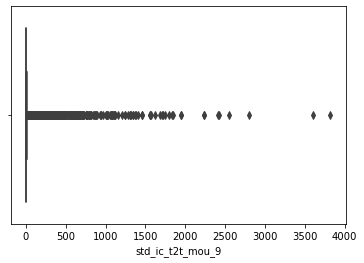

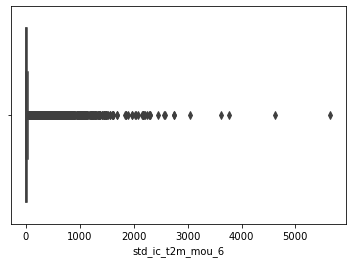

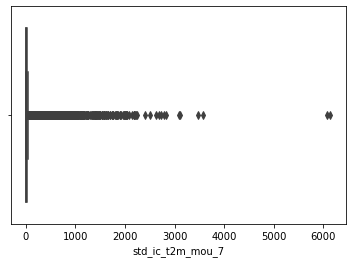

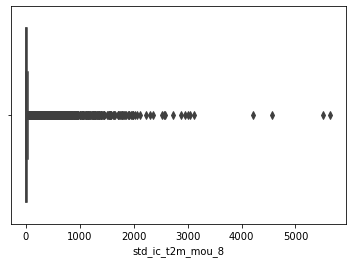

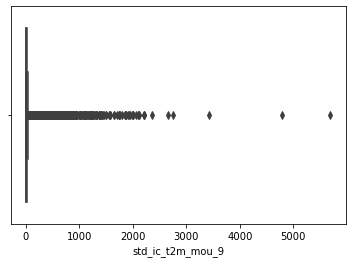

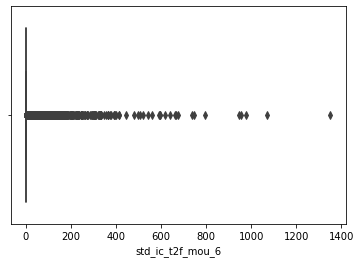

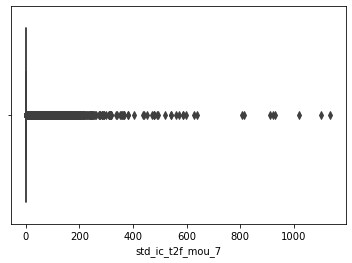

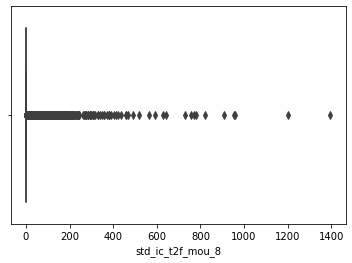

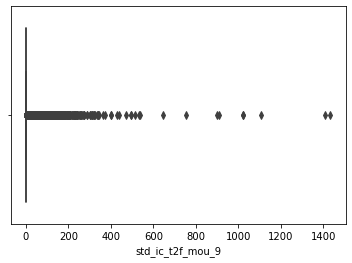

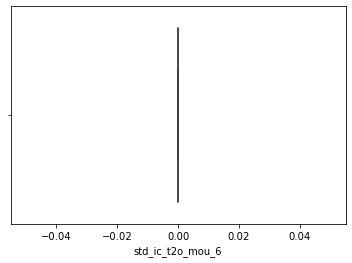

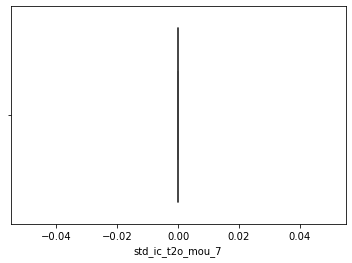

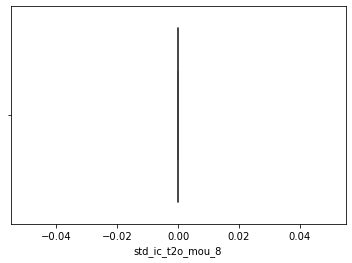

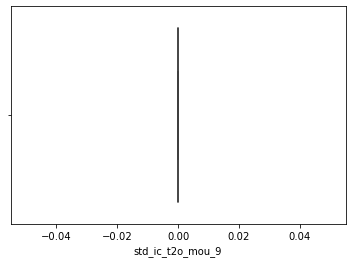

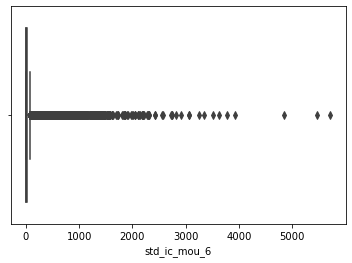

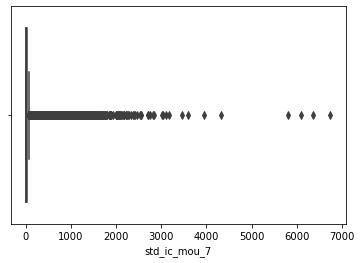

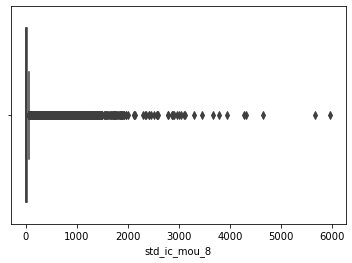

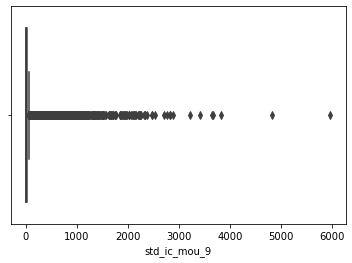

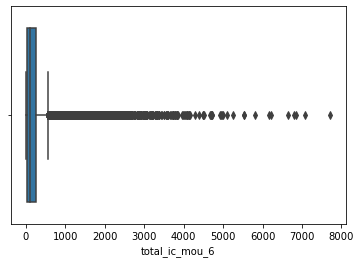

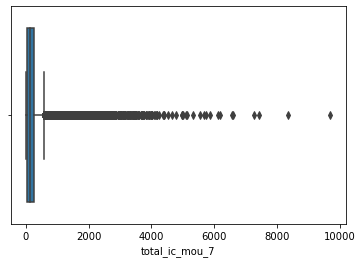

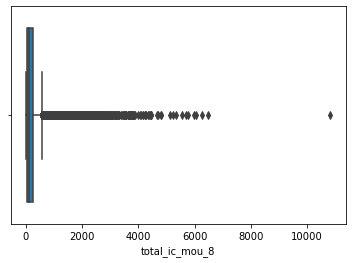

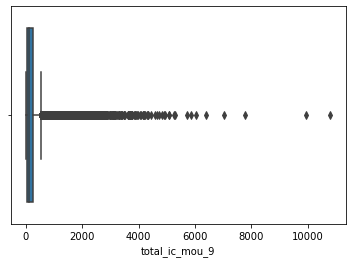

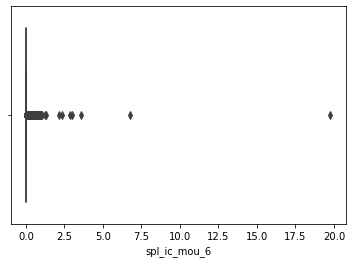

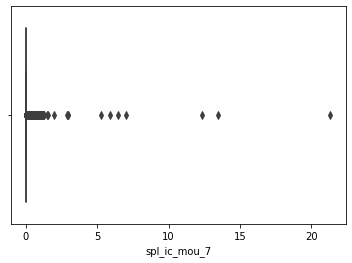

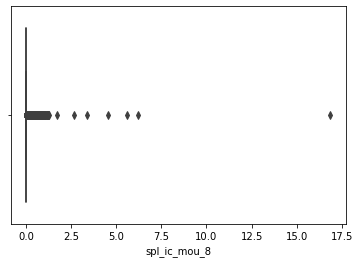

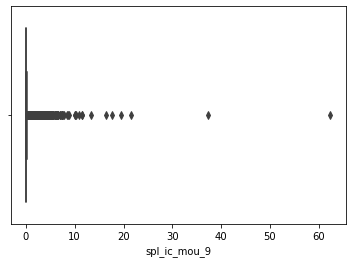

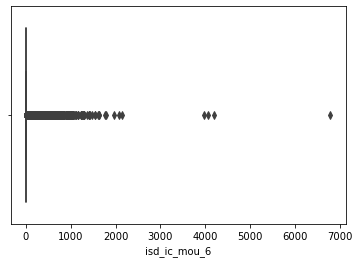

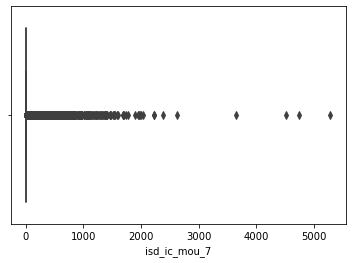

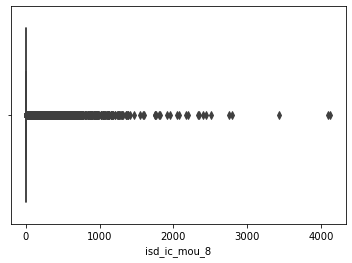

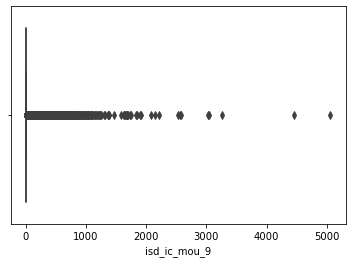

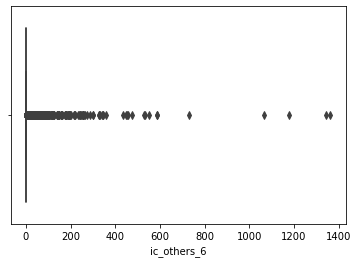

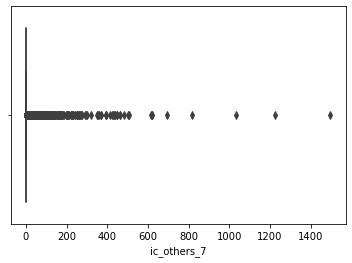

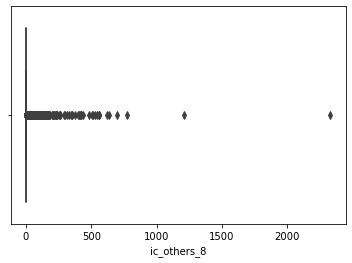

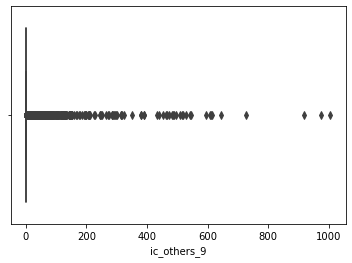

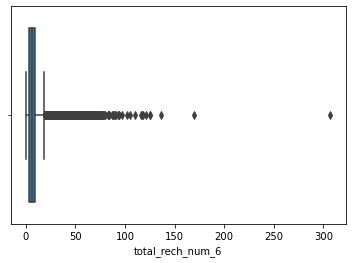

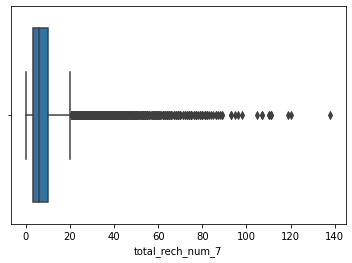

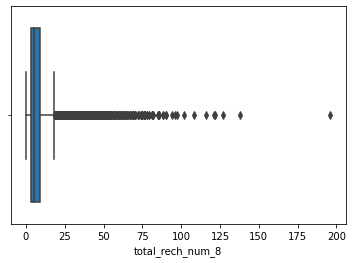

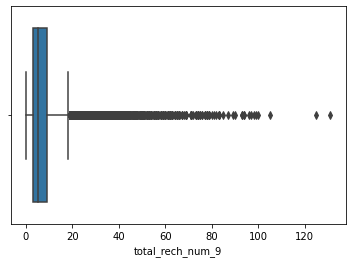

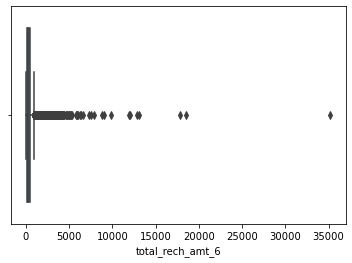

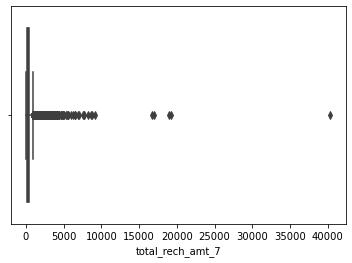

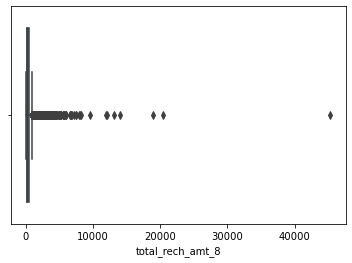

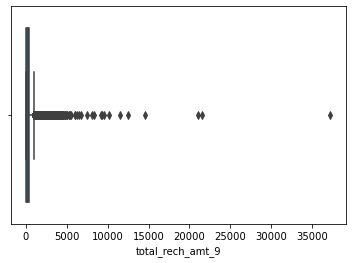

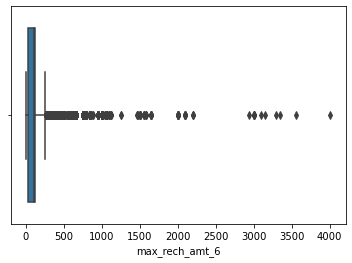

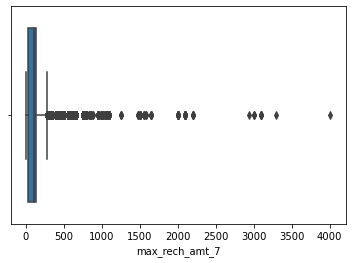

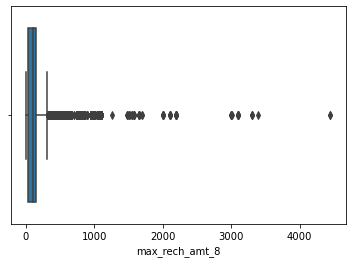

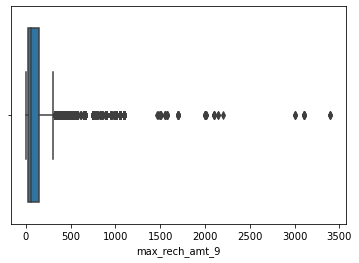

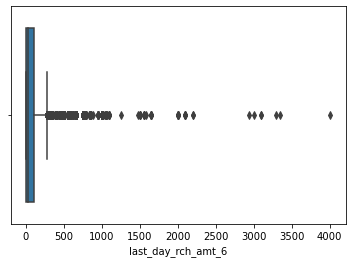

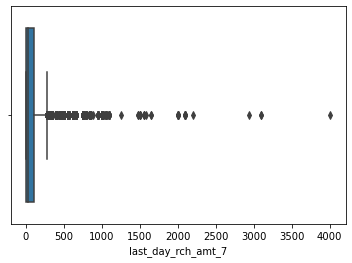

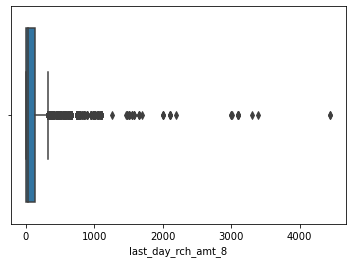

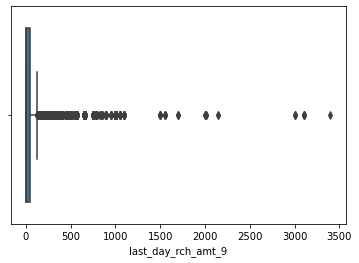

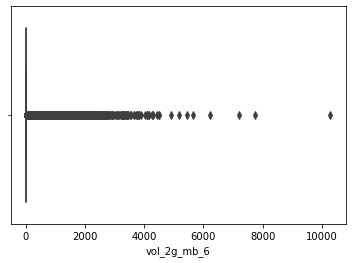

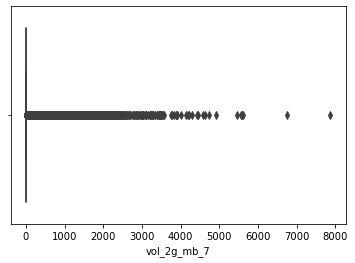

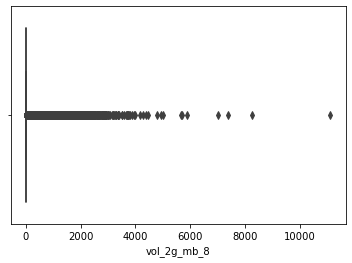

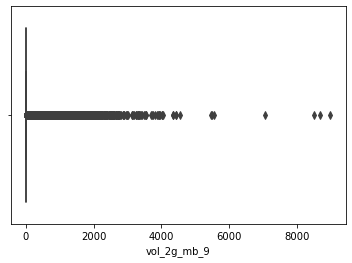

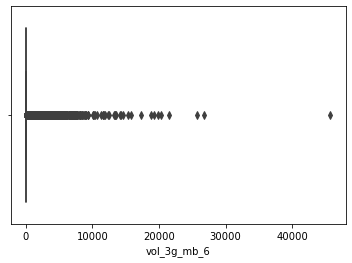

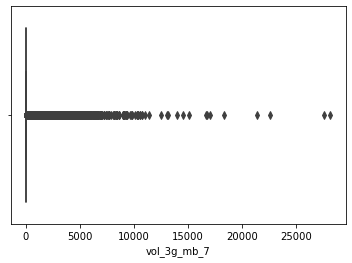

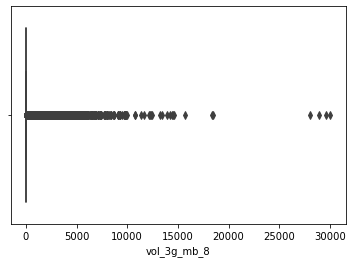

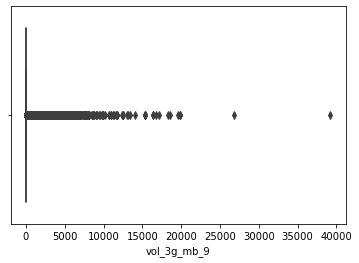

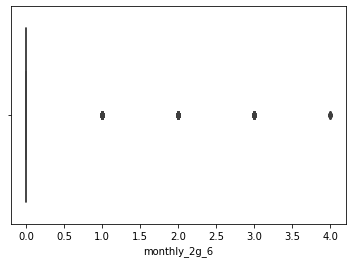

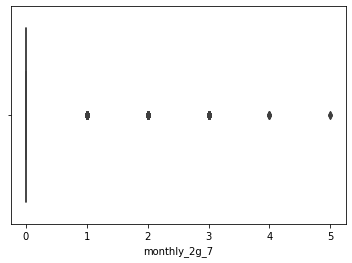

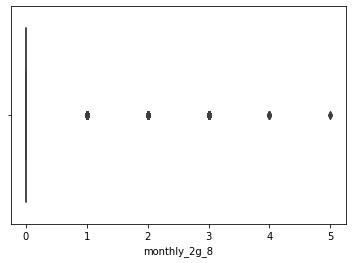

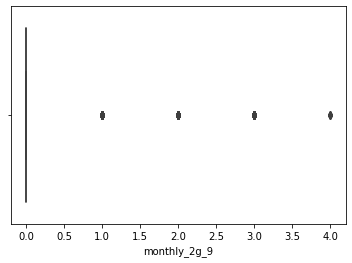

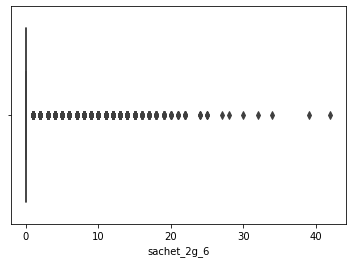

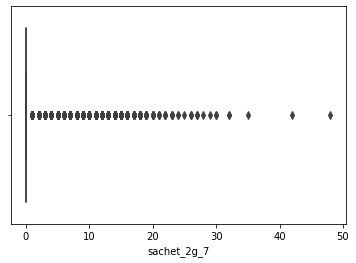

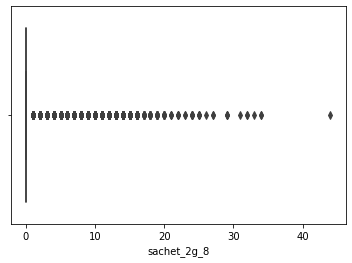

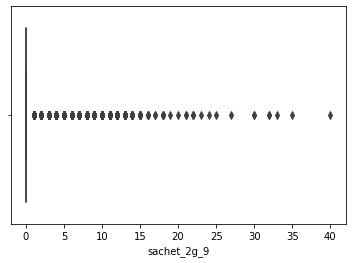

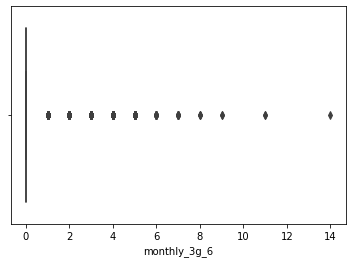

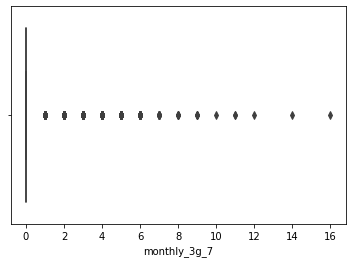

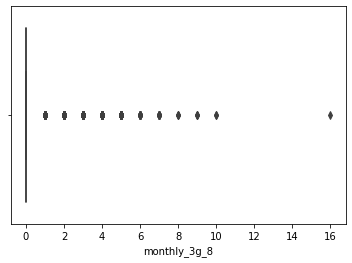

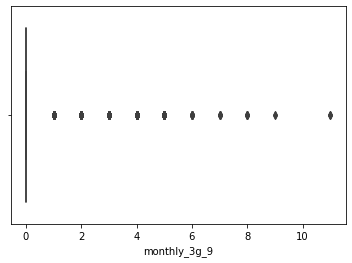

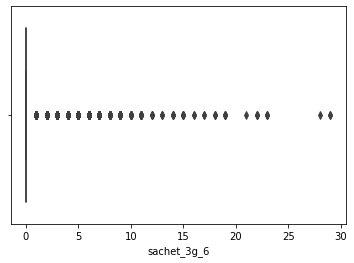

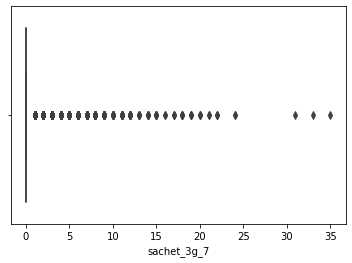

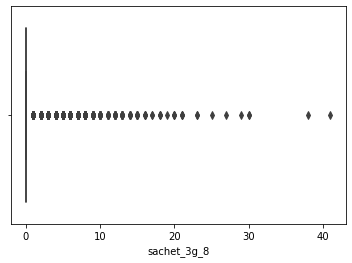

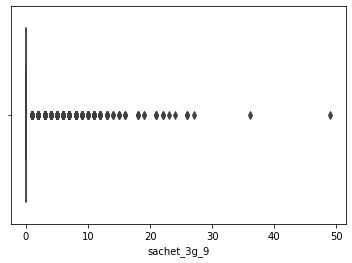

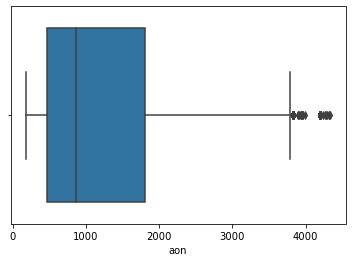

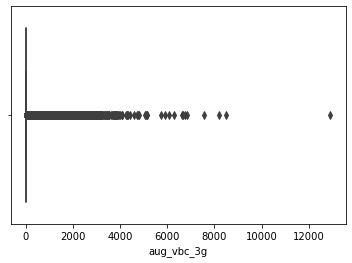

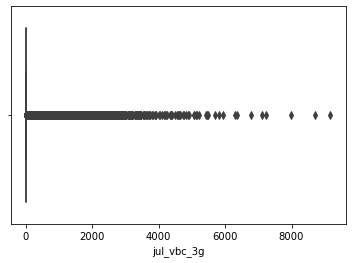

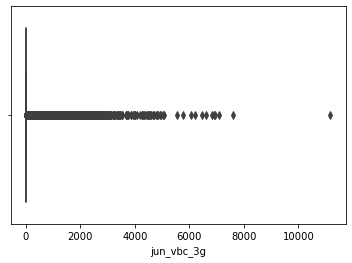

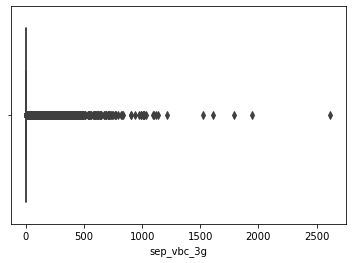

In [299]:
# Analysing Numerical Variables for imputation:
col1=telecom.select_dtypes(exclude="object").columns
for i in col1:
    sns.boxplot(telecom[i])
    plt.show()

- Except for variables 'mobile_number', 'circle_id', 'AON' we are replacing the null values of the remaining variables with zero.

In [300]:
# Filling the numerical variables with zero except for columns 'mobile_number','aon','circle_id':
col2=[i for i in col1 if i not in ('mobile_number','aon','circle_id')]
telecom[col2]=telecom[col2].fillna(0)
telecom[col2]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,...,1,0,0,0,0,0,30.40,0.00,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,...,0,0,0,0,0,0,0.00,0.00,0.00,0.00
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,...,0,0,0,0,0,0,0.00,0.00,4.17,0.00
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,...,0,0,0,0,0,0,0.00,0.00,0.00,0.00
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,...,0,0,0,0,0,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,18.471,69.161,57.530,29.950,5.40,3.36,5.91,...,0,0,0,0,0,0,0.00,0.00,0.00,0.00
99995,0.0,0.0,0.0,112.201,77.811,79.081,140.835,29.26,18.13,16.06,...,0,0,0,0,0,0,0.00,0.00,0.00,0.00
99996,0.0,0.0,0.0,229.187,0.000,0.000,0.000,1.11,0.00,0.00,...,0,0,0,0,0,0,0.00,0.00,0.00,0.00
99997,0.0,0.0,0.0,322.991,303.386,606.817,731.010,0.00,0.00,0.00,...,4,4,1,0,0,0,1445.74,1151.03,1173.18,0.00


- Since classification of churn is based on 'Usage' instead of 'Time' during which customer is inactive, we can safely delete
the date columns.

In [301]:
telecom.drop(telecom.select_dtypes(include='object').columns,axis=1,inplace=True)
telecom.shape

(99999, 178)

In [302]:
# Checking for Null values in columns:
pd.DataFrame(round(telecom.isnull().sum()/len(telecom)*100,2).sort_values(ascending=False))

,0
mobile_number,0.0
total_rech_num_6,0.0
std_ic_mou_6,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
...,...
std_og_mou_6,0.0
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0


In [303]:
telecom.shape

(99999, 178)

### Data Preparation:

#### Deriving New Features:

* **Good Phase:** The 6 th month and 7 th month i.e., June and July months are considered a part of Good phase, where customer seems to be satisfied with service offered by the network.
* **Action Phase:** The 8 th month is taken as action phase, where customers seems to be dissatisfied and is starting to reduce the services offered by the network.
* **Churn Phase:** The 9th month is taken as churn phase, where customer shifted to another network.

- Deriving a new column named 'rech_avg_good_action_diff' to know the increase or decrease in recharge amount of customers during action phase and good phase.

In [304]:
# Since 6th and 7th months are part of good phase, we took average of them for good phase recharge amount calculation.
telecom["rech_amt_avg_good_action_diff"]=((telecom.total_rech_amt_6+telecom.total_rech_amt_7)/2)-telecom.total_rech_amt_8
# 1 indicates decrease in amount of recharge during action phase compared to good phase, 0  indicates otherwise.
telecom["rech_amt_avg_good_action_diff"]=np.where((telecom["rech_amt_avg_good_action_diff"]>0),1,0)

- Deriving a new column named 'rech_num_avg_good_action_diff' to know increase or decrease in number of times a customer recharged during action phase, good phase.

In [305]:
# Since 6th and 7th months are part of good phase, we took average of them for good phase recharge numbers calculation.
telecom["rech_num_avg_good_action_diff"]=((telecom.total_rech_num_6+telecom.total_rech_num_7)/2)-telecom.total_rech_num_8
# 1 indicates decrease in number of times recharge done during action phase compared to good phase, 0  indicates otherwise.
telecom["rech_num_avg_good_action_diff"]=np.where((telecom["rech_num_avg_good_action_diff"]>0),1,0)

- Deriving new column named 'mou_avg_good_action_diff' which indicates increase or decrease in minutes of usage during action and good phase.

In [306]:
# We are considering sum of income and outgoing minutes of usage call for calculation of total mou for that particular month.
# Then we are taking average of 6 th and 7th month for calculation of average during good phase.
telecom["mou_avg_good_action_diff"]=(telecom.total_og_mou_6+telecom.total_ic_mou_6+telecom.total_ic_mou_7+telecom.total_og_mou_7)/2 - (telecom.total_og_mou_8+telecom.total_ic_mou_8)/2
# 1 indicates decrease in minute of usage in action phase compared to good phase, 0 indicates otherwise.
telecom["mou_avg_good_action_diff"]=np.where((telecom["mou_avg_good_action_diff"]>0),1,0)

- Deriving a new column named 'vol_avg_good_action_diff' to indicate whether there is decrease or increase in volume of data usage during action and good phases.

In [307]:
# Data usage over 2G and 3G network as considered in total and they are averaged over 6th and 7th months for good phase calculation.
telecom["vol_avg_good_action_diff"]=(telecom.vol_2g_mb_6+telecom.vol_3g_mb_6+telecom.vol_2g_mb_7+telecom.vol_3g_mb_7)/2 - (telecom.vol_2g_mb_8+telecom.vol_3g_mb_8)
telecom["vol_avg_good_action_diff"]=np.where((telecom["vol_avg_good_action_diff"]>0),1,0)
telecom.shape

(99999, 182)

- Deriving a new column named 'isd_avg_good_action_diff' to indicate whether there is decrease or increase in isd calls made by cusotmer during action and good phase.

In [308]:
# The sum of incoming and outgoing isd calls are taken as total for every month
# average of 6th and 7th month total isd calls is taken to get average isd calls made during good phase
telecom["isd_avg_good_action_diff"]=(telecom.isd_og_mou_6+telecom.isd_ic_mou_6+telecom.isd_ic_mou_7+telecom.isd_og_mou_7)/2-(telecom.isd_ic_mou_8+telecom.isd_og_mou_8)
telecom["isd_avg_good_action_diff"]=np.where((telecom["isd_avg_good_action_diff"]>0),1,0)
telecom.shape

(99999, 183)

- Deriving a new column named 'monthly_avg_good_action_diff' to indicate whether there is decrease or increase in availing service schemes with validity equivalent to a month

In [309]:
# Monthly services schemes of both 2g and 3g network both are added to get total monthly schemes availed for a particular month.
# The total are averaged for 6th and 7th months for calculation of good phase.
telecom["monthly_avg_good_action_diff"]=(telecom.monthly_2g_6+telecom.monthly_3g_6+telecom.monthly_2g_7+telecom.monthly_3g_7)/2-(telecom.monthly_2g_8+telecom.monthly_3g_8)
telecom["monthly_avg_good_action_diff"]=np.where((telecom["monthly_avg_good_action_diff"]>0),1,0)
telecom.shape

(99999, 184)

- Deriving a new column named "vbc_avg_good_action_diff" to know whether there is a decrease or increase in volume based cost by post paid users during action and good phase

In [310]:
# vbc over june and july months are averaged for calculation over good phase.
telecom["vbc_avg_good_action_diff"]=(telecom.jun_vbc_3g+telecom.jul_vbc_3g)/2-telecom.aug_vbc_3g
# 1 indicates a decrease in volume based cost during action phase when compared to good phase, 0 indicates otherwise.
telecom["vbc_avg_good_action_diff"]=np.where(telecom["vbc_avg_good_action_diff"]>0,1,0)
telecom.shape

(99999, 185)

- Deriving a new column named "arpu_avg_good_action_diff" to know decrease or increase in 'average revenue per user' during action and good phases.

In [311]:
# average revenue per user over 6th and 7th months are averaged
telecom['arpu_avg_good_action_diff']=(telecom.arpu_6+telecom.arpu_7)/2-telecom.arpu_8
telecom['arpu_avg_good_action_diff']= np.where(telecom['arpu_avg_good_action_diff']>0,1,0)
telecom.shape

(99999, 186)

#### Filtering High Valued Customers:

- Those who have recharged with an amount more than or equal to 70 th percentile of average recharge amount in the first two months (i.e., during good phase) are deemed as "High Valued Customers"
- Filtering 'telecom' data with the above condition

In [312]:
telecom=telecom[(telecom.total_rech_amt_6+telecom.total_rech_amt_7)/2 >= np.percentile((telecom.total_rech_amt_6+telecom.total_rech_amt_7)/2,70)]
telecom.shape

(30011, 186)

- After filtering, We end up with a data frame consisting of 30,011 rows and 186 columns

#### Tagging Churners:

- The customers who have not made any calls (either incoming OR outgoing) AND have not used mobile internet even once in the 'churn phase' (i.e., in 9th month) are taken as "Churners" (1) and the rest are "Non Churners" (0).
- Creating a new column named 'churn' (target variable)

In [313]:
telecom['churn']=np.where((((telecom.total_ic_mou_9==0) | (telecom.total_og_mou_9==0)) & (telecom.vol_2g_mb_9==0) & (telecom.vol_3g_mb_9==0)),1,0)
telecom.shape

(30011, 187)

In [314]:
# Dropping the columns which consists "_9" in their names.
col9=[i for i in telecom.columns if i.find("_9")!=-1]
telecom=telecom.drop(col9,axis=1)
len(col9)

42

In [315]:
telecom.shape

(30011, 145)

In [316]:
# Checking for duplicates in mobile number column
sum(telecom.mobile_number.duplicated())

0

- Since there are no duplicates, we could delete 'mobile_number' column.
- There is no use of'circle_id' column, thus we can drop it safely.

In [317]:
telecom=telecom.drop(['mobile_number','circle_id'],axis=1)
telecom.shape

(30011, 143)

In [318]:
telecom.churn.value_counts()

0    27117
1     2894
Name: churn, dtype: int64

#### Capping the outliers:

In [319]:
## We are capping the outliers present in individual columns at 90 th percentile value.
t1=telecom
l9={}
for i in telecom.select_dtypes(include='float64').columns:
    l9[i]=np.percentile(telecom[i],90)
l9=l9.items()
for c,v in l9:
    t1[c]=telecom[c].apply(lambda x:x if x<v else v)
t1.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sep_vbc_3g,rech_amt_avg_good_action_diff,rech_num_avg_good_action_diff,mou_avg_good_action_diff,vol_avg_good_action_diff,isd_avg_good_action_diff,monthly_avg_good_action_diff,vbc_avg_good_action_diff,arpu_avg_good_action_diff,churn
7,0.0,0.0,0.0,994.099,995.557,985.202,57.84,54.68,52.29,453.43,...,0.0,0,0,1,0,0,0,0,0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,...,0.0,1,1,1,1,0,1,1,1,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,...,0.0,0,0,1,0,0,0,0,0,0
16,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,...,0.0,1,1,1,0,0,0,1,1,0
17,0.0,0.0,0.0,690.008,18.980,25.499,794.98,9.28,7.79,61.64,...,0.0,1,1,1,0,0,0,0,1,0


In [320]:
t1.mou_avg_good_action_diff.value_counts()
t1.monthly_avg_good_action_diff.value_counts()

0    25629
1     4382
Name: monthly_avg_good_action_diff, dtype: int64

### Exploratory Data Anlaysis:

#### Univariate Analysis:

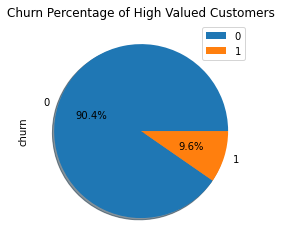

In [321]:
### Churn count 
t1.churn.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,legend=True,title='Churn Percentage of High Valued Customers')
plt.show()

In the above pie chart
- **'0'** indicates **'No Churn'**
- **'1'** indicates **'Churn'**
- From the above pie chart, we can infer that there is data imbalance in the ratio of 1:10 approximately.

In [322]:
t1.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sep_vbc_3g,rech_amt_avg_good_action_diff,rech_num_avg_good_action_diff,mou_avg_good_action_diff,vol_avg_good_action_diff,isd_avg_good_action_diff,monthly_avg_good_action_diff,vbc_avg_good_action_diff,arpu_avg_good_action_diff,churn
count,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,0.0,0.0,0.0,541.996166,542.474341,486.823367,237.063518,243.000559,204.038843,359.237548,...,0.0,0.609310,0.644464,0.937523,0.258572,0.253974,0.146013,0.167605,0.592516,0.096431
std,0.0,0.0,0.0,246.134448,245.109262,277.996871,257.878901,267.876411,235.908030,279.385890,...,0.0,0.487913,0.478683,0.242024,0.437857,0.435290,0.353125,0.373522,0.491374,0.295187
min,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,364.161000,365.004500,289.609500,41.110000,40.950000,27.010000,137.335000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,495.682000,493.561000,452.091000,125.830000,125.460000,99.440000,282.190000,...,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.0,0.0,0.0,703.922000,700.788000,671.150000,353.310000,359.925000,297.735000,523.125000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,0.0,0.0,0.0,994.099000,995.557000,985.202000,794.980000,824.380000,723.610000,915.580000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### BiVariate Anlaysis:

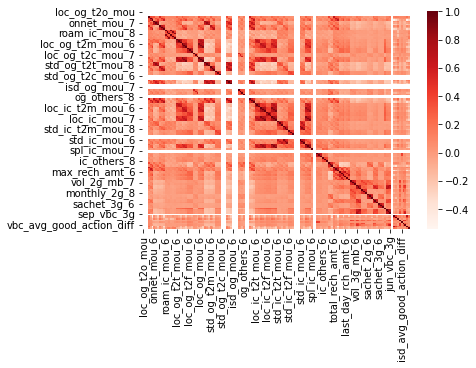

In [323]:
sns.heatmap(t1.corr(),cmap='Reds')
plt.show()

In [324]:
t1.corr()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sep_vbc_3g,rech_amt_avg_good_action_diff,rech_num_avg_good_action_diff,mou_avg_good_action_diff,vol_avg_good_action_diff,isd_avg_good_action_diff,monthly_avg_good_action_diff,vbc_avg_good_action_diff,arpu_avg_good_action_diff,churn
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,1.000000,0.380671,0.322911,0.348159,0.132814,0.112979,0.515099,...,NaN,0.126629,0.143153,0.128276,0.088779,0.080841,0.083325,0.096713,0.184403,0.060578
arpu_7,NaN,NaN,NaN,0.380671,1.000000,0.600762,0.147080,0.346104,0.280779,0.233066,...,NaN,-0.087317,-0.040496,-0.021199,0.043320,0.049088,0.079022,0.049598,-0.041251,-0.071393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
isd_avg_good_action_diff,NaN,NaN,NaN,0.080841,0.049088,0.008547,-0.027286,-0.046514,-0.054740,0.044416,...,NaN,0.037002,0.034047,0.079138,0.038842,1.000000,0.032103,0.062204,0.039235,0.025415
monthly_avg_good_action_diff,NaN,NaN,NaN,0.083325,0.079022,-0.047226,-0.114948,-0.113442,-0.105990,-0.103045,...,NaN,0.131708,0.095798,-0.041417,0.493080,0.032103,1.000000,0.317699,0.140880,0.014525
vbc_avg_good_action_diff,NaN,NaN,NaN,0.096713,0.049598,0.005205,-0.132663,-0.143774,-0.124901,-0.096534,...,NaN,0.044462,0.085048,-0.019809,0.446890,0.062204,0.317699,1.000000,0.055672,0.009052
arpu_avg_good_action_diff,NaN,NaN,NaN,0.184403,-0.041251,-0.540381,0.074985,-0.043868,-0.237882,0.095337,...,NaN,0.704985,0.410151,0.172872,0.133671,0.039235,0.140880,0.055672,1.000000,0.188900


In [325]:
t1.rech_amt_avg_good_action_diff.value_counts(normalize=True)
t1.rech_num_avg_good_action_diff.value_counts(normalize=True)
t1.mou_avg_good_action_diff.value_counts(normalize=True)
t1.monthly_avg_good_action_diff.value_counts(normalize=True)
t1.vol_avg_good_action_diff.value_counts(normalize=True)
t1.isd_avg_good_action_diff.value_counts(normalize=True)
t1.vbc_avg_good_action_diff.value_counts(normalize=True)
t1.arpu_avg_good_action_diff.value_counts(normalize=True)

1    0.592516
0    0.407484
Name: arpu_avg_good_action_diff, dtype: float64

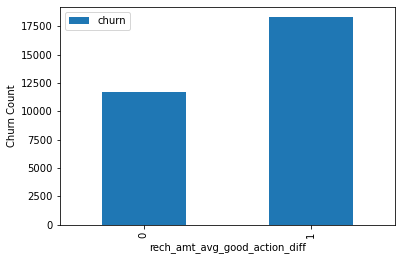

In [326]:
t1.groupby('rech_amt_avg_good_action_diff')['churn'].count().plot.bar(legend=True)
plt.ylabel('Churn Count')
plt.show()

- From the above plot, we can see that rech_amt_avg_good_action_diff signifies:
'recharge during good phase' - 'recharge during action phase'
- Postive difference (i.e., 1) indicates, decrease in recharge during action phase.
- Negative difference indicates (i.e., 0) indicates increase in recharge during action phase.
- The churn count seems to be high for category '1' which signifies that there is higher chance for the customer to churn, if there is decrease in recharge during action phase.

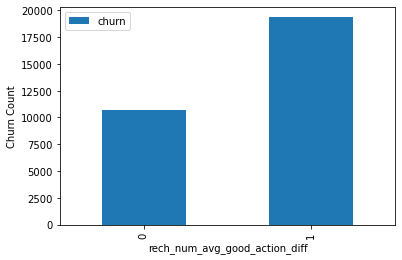

In [327]:
t1.groupby('rech_num_avg_good_action_diff')['churn'].count().plot.bar(legend=True)
plt.ylabel('Churn Count')
plt.show()

- From the above plot, we can see that churn count is more for category '1' which signifies decrease in number of times recharge done during action phase.
- Thus we can say that the chance of churning is significant for customers who does recharge least number of times in action phase when compared to good phase.

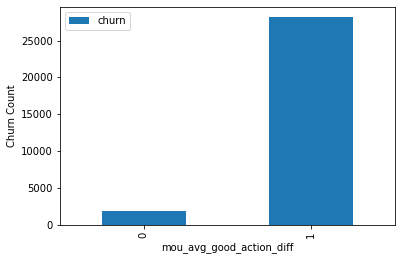

In [328]:
t1.groupby('mou_avg_good_action_diff')['churn'].count().plot.bar(legend=True)
plt.ylabel('Churn Count')
plt.show()

- As evident by the above graph, If customer spends less time or less minutes of usage on your network it signifies almost the customer has abandoned the usage of network and is ready to churn.

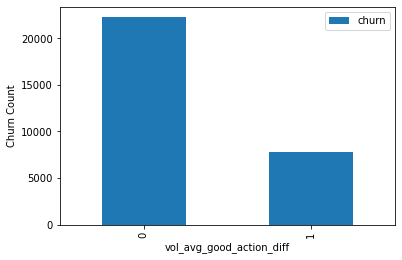

In [329]:
t1.groupby('vol_avg_good_action_diff')['churn'].count().plot.bar(legend=True)
plt.ylabel('Churn Count')
plt.show()

- From the above graph, we can see that volume of data used by 'non churn customers' is more when compared to 'churn customers'.
- This indicates that when there is decrease in usage of volume of data by customer during action phase, it signifies that customer is about to churn.

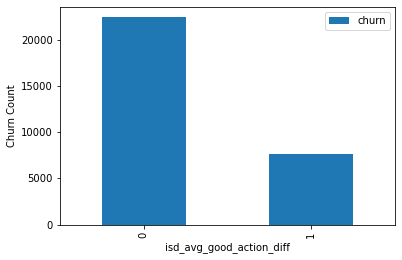

In [330]:
t1.groupby('isd_avg_good_action_diff')['churn'].count().plot.bar(legend=True)
plt.ylabel('Churn Count')
plt.show()

- The customer who is about to churn, would make less 'ISD' calls during action phase as indicated by above graph.

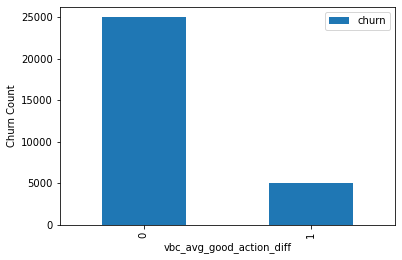

In [331]:
t1.groupby('vbc_avg_good_action_diff')['churn'].count().plot.bar(legend=True)
plt.ylabel('Churn Count')
plt.show()

- From the above plot, we can see that customer who is about to churn will have low 'volume based cost' during action phase when compared to good phase.

#### Multi Variate Analysis:

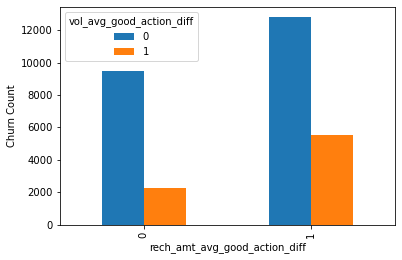

In [332]:
## Churn count as per 'vol_avg_good_action_diff' and 'rech_amt_avg_good_action_diff'
t1.pivot_table(values='churn', index='rech_amt_avg_good_action_diff', columns='vol_avg_good_action_diff', aggfunc='count').plot.bar()
plt.ylabel('Churn Count')
plt.show()

- From the above plot, we can see the customers who churn are good users of data.
- From this we can infer that, data services has to be improved inorder to prevent the churning of customers.

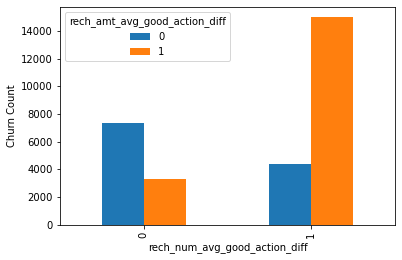

In [333]:
## Churn count as per 'vol_avg_good_action_diff' and 'rech_amt_avg_good_action_diff'
t1.pivot_table(values='churn', index='rech_num_avg_good_action_diff', columns='rech_amt_avg_good_action_diff', aggfunc='count').plot.bar()
plt.ylabel('Churn Count')
plt.show()

- From the above plot, we can see that the customers who recharge less amount and less number of times during action phase are more likely to churn.

### Train Test Splitting:

In [334]:
y=t1.pop('churn')
X=t1

In [335]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

### Handling Data Imbalance Using SMOTE:

- Since from the pie chart, we witnessed there is data imbalance. Model building on imbalance data set would lead to biased model.
- Thus we are using SMOTE technique to over sample the minority data points and train the model on them. 

In [336]:
smt=SMOTE(random_state=42,k_neighbors=5)
X_train,y_train = smt.fit_resample(X_train,y_train)

#### Scaling of Variables:

In [337]:
scaler=StandardScaler()
## Since the derived features/ variables are binary, there is no need to scale them.
## Thus excluding the derived features/ varibles and applying scaling only on non derived features/variables
nd=list(X_train.columns)
nd=nd[:-8]

In [338]:
# Fitting and Transforming the train data of non derived columns
X_train[nd]=scaler.fit_transform(X_train[nd])
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,jun_vbc_3g,sep_vbc_3g,rech_amt_avg_good_action_diff,rech_num_avg_good_action_diff,mou_avg_good_action_diff,vol_avg_good_action_diff,isd_avg_good_action_diff,monthly_avg_good_action_diff,vbc_avg_good_action_diff,arpu_avg_good_action_diff
0,0.0,0.0,0.0,-0.198437,-0.532395,-0.300574,-0.746326,-0.685093,-0.524229,-0.183983,...,-0.417355,0.0,1,1,1,0,0,0,0,1
1,0.0,0.0,0.0,-0.683101,-0.691129,0.161716,-0.605862,-0.079512,-0.001454,0.453755,...,-0.417355,0.0,1,0,1,0,0,0,0,0
2,0.0,0.0,0.0,-0.157706,-1.107592,0.292750,-0.896562,-0.827729,-0.695622,-1.249816,...,-0.417355,0.0,0,0,1,1,0,0,0,0
3,0.0,0.0,0.0,-0.565162,-0.325937,0.845854,1.009107,1.110057,2.647228,-1.088772,...,-0.417355,0.0,0,0,1,1,0,0,0,0
4,0.0,0.0,0.0,0.324665,-0.056774,0.511891,-0.491346,-0.489270,-0.007232,-0.230683,...,2.105517,0.0,1,1,1,0,0,0,1,1


In [339]:
# Only transformation should be applied on test data set, not fitting and transforming
X_test[nd]=scaler.transform(X_test[nd])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,jun_vbc_3g,sep_vbc_3g,rech_amt_avg_good_action_diff,rech_num_avg_good_action_diff,mou_avg_good_action_diff,vol_avg_good_action_diff,isd_avg_good_action_diff,monthly_avg_good_action_diff,vbc_avg_good_action_diff,arpu_avg_good_action_diff
39713,0.0,0.0,0.0,-0.955985,0.114635,2.075605,-0.333755,0.102681,0.300425,-0.803556,...,-0.417355,0.0,0,0,1,0,0,0,0,0
80955,0.0,0.0,0.0,1.726867,1.077823,-1.192235,1.969152,2.173324,-0.497836,-0.191540,...,-0.417355,0.0,1,1,1,0,0,0,0,1
80034,0.0,0.0,0.0,1.726867,1.869796,2.075605,1.969152,2.173324,2.647228,1.669855,...,-0.417355,0.0,0,0,0,0,0,0,0,0
93911,0.0,0.0,0.0,0.235742,-0.228616,0.832225,-0.033869,0.112978,1.356329,-0.415687,...,-0.417355,0.0,0,0,1,0,0,0,0,0
55461,0.0,0.0,0.0,-1.887187,1.672074,0.893567,-0.777362,2.173324,2.647228,-1.153501,...,-0.417355,0.0,0,0,1,0,0,0,0,0


### Applying Principle Component Analysis (PCA):

We use PCA here to reduce the number of features/ variables, thus making less complex model.

In [340]:
pca=PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [341]:
# pca components (i.e., eigen vectors)
pca.components_

array([[ 3.07669561e-19,  5.55111512e-17,  0.00000000e+00, ...,
         1.05789344e-02,  1.33965219e-02, -2.97004000e-02],
       [-7.19408555e-19,  5.55111512e-17,  0.00000000e+00, ...,
        -2.27127832e-02, -2.64634515e-02, -2.02431155e-02],
       [ 2.54380602e-19, -2.77555756e-17, -4.78783679e-16, ...,
         3.10715831e-02,  3.46025549e-02, -5.61461379e-02],
       ...,
       [-0.00000000e+00, -9.02664412e-02,  5.05459305e-02, ...,
         1.22298005e-16,  8.06646416e-17,  1.12323345e-16],
       [ 0.00000000e+00, -1.08747684e-16,  6.11447030e-17, ...,
         1.67941091e-31, -6.16297582e-32, -9.62964972e-32],
       [ 9.99997067e-01, -1.17895612e-03, -2.11543112e-03, ...,
         7.42678488e-18,  8.67361738e-19, -2.84603070e-19]])

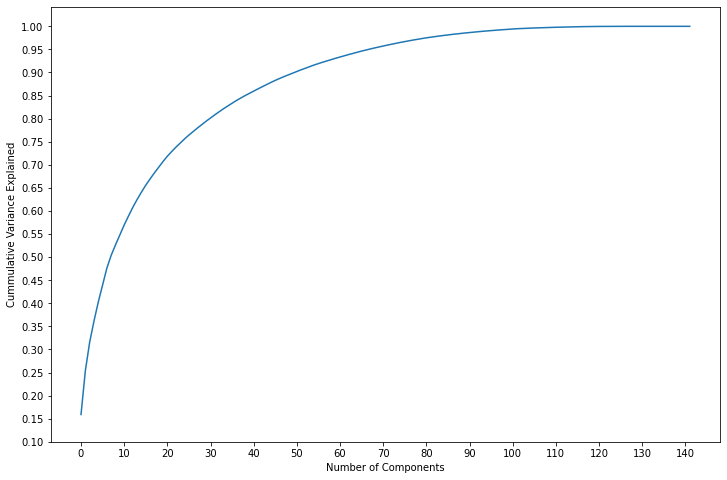

In [342]:
## Looking at the explained variance ratio and scree plot:
var_cumu=np.cumsum(pca.explained_variance_ratio_)
fig=plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel('Cummulative Variance Explained')
plt.xlabel('Number of Components')
plt.yticks(np.arange(0.10,1.05,0.05))
plt.xticks(np.arange(0,150,10))
plt.show()

- From the scree plot, we can see that 75 number of components could explain approximately 95% variance in the data.
- Thus choosing 75 number of components as optimal number

#### Performing PCA with 75 number of components:

<AxesSubplot:>

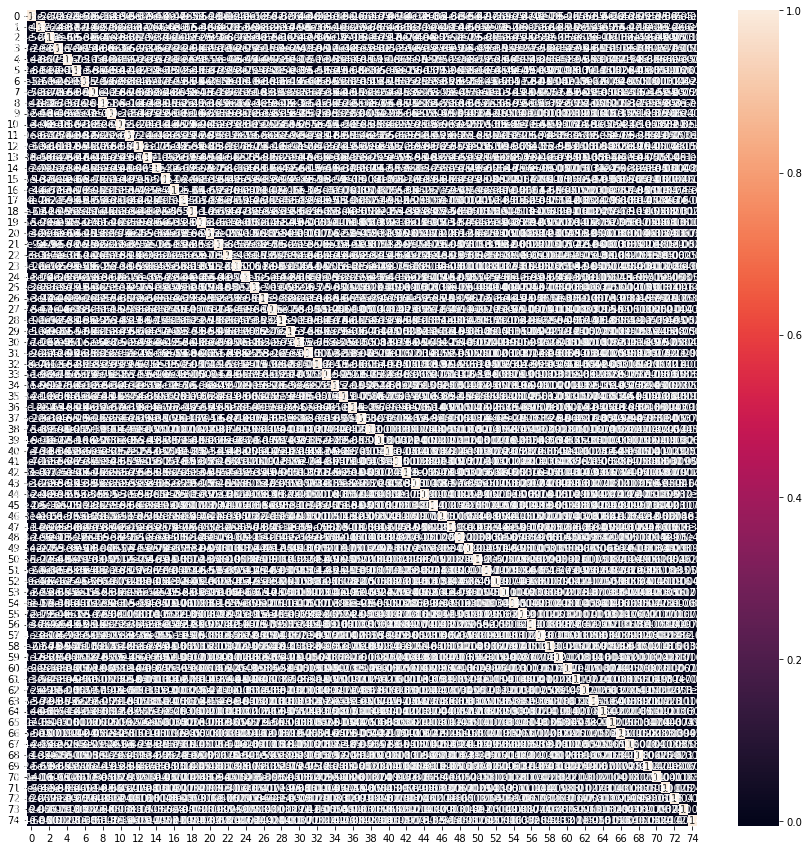

In [343]:
pca_final=IncrementalPCA(n_components=75)
X_train_pca=pca_final.fit_transform(X_train)
corrmat=np.corrcoef(X_train_pca.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat,annot=True)

- From the above correlation plot, we can see that 75 number of principal components are not correlated thus ensuring independency among them.

In [344]:
# Applying PCA transformation on Test set:
X_test_pca=pca_final.transform(X_test)
X_test.shape

(9004, 142)

### Model 1:

### Logistic Regression Model with PCA:

In [345]:
learner_pca=LogisticRegression()
# fitting the model on train pca data set
log_model_pca=learner_pca.fit(X_train_pca,y_train)
# predictions on train pca data set
y_train_pred=log_model_pca.predict(X_train_pca)

In [346]:
# Building confusion matrix:
confusion_log_pca=metrics.confusion_matrix(y_train,y_train_pred)
print(confusion_log_pca)

[[16047  2928]
 [ 2615 16360]]


In [347]:
#True Positives
TP = confusion_log_pca[1,1]
# True Negatives
TN = confusion_log_pca[0,0]
# False Positives
FP = confusion_log_pca[0,1]
# False Negatives
FN = confusion_log_pca[1,0]

In [349]:
print("The Accuracy of Logistic Regression PCA model on train data is:",round(metrics.accuracy_score(y_train,y_train_pred),2))
print("The Recall or Sensitivity of Logistic Regression PCA model on train data is:", round(TP/(TP+FN),2))
print("The specificity of Logistic Regression PCA model on train data is:", round(TN/(TN+FP),2))
print("The Precision of Logistic Regression PCA model on train data is:", round(TP/(TP+FP),2))

The Accuracy of Logistic Regression PCA model on train data is: 0.85
The Recall or Sensitivity of Logistic Regression PCA model on train data is: 0.86
The specificity of Logistic Regression PCA model on train data is: 0.85
The Precision of Logistic Regression PCA model on train data is: 0.85


##### Log PCA Model prediction on Test PCA set:

In [350]:
y_test_pred=log_model_pca.predict(X_test_pca)

In [351]:
# Confusion Matrix:
confusion_log_pca1=metrics.confusion_matrix(y_test,y_test_pred)
print(confusion_log_pca1)

[[6901 1241]
 [ 187  675]]


In [352]:
#True Positives
TP1 = confusion_log_pca1[1,1]
# True Negatives
TN1 = confusion_log_pca1[0,0]
# False Positives
FP1 = confusion_log_pca1[0,1]
# False Negatives
FN1 = confusion_log_pca1[1,0]

In [353]:
print("The Accuracy of Logistic Regression PCA model on test data is:",round(metrics.accuracy_score(y_test,y_test_pred),2))
print("The Recall or Sensitivity of Logistic Regression PCA model on test data is:", round(TP1/(TP1+FN1),2))
print("The specificity of Logistic Regression PCA model on test data is:", round(TN1/(TN1+FP1),2))
print("The Precision of Logistic Regression PCA model on test data is:", round(TP1/(TP1+FP1),2))

The Accuracy of Logistic Regression PCA model on test data is: 0.84
The Recall or Sensitivity of Logistic Regression PCA model on test data is: 0.78
The specificity of Logistic Regression PCA model on test data is: 0.85
The Precision of Logistic Regression PCA model on test data is: 0.35


- Our Models goodness here is dependent on a particular specific paramter i.e., 'Recall Value'
- Because, we dont want losing potential high valued customers, thus **'Recall'** / **Sensitivity** is the important parameter we have to consider.
- Even though we corrected imbalance data set and can rely on 'accuracy' score, we dont want a churn customer to be predicted as non churn customer, thus resulting in losing that customer.
- From the above Logistic Regression PCA model, we can deduce that model has
- **Recall or Sensitivity** as **85 %** on Train Data set.
- **Recall or Sensitivity** as  **78%** on Test Data set.
<br>Thus, we can say the above model is reasonably performing well.

### Model 2:

### Decision Tree with PCA:

In [354]:
%%time
dt=DecisionTreeClassifier(random_state=42)
## Hyper parameter Tuning:
params={ 'max_depth':[5,10,20],
       'min_samples_leaf':[5,10,20,50,100,150],
       'criterion':['gini'],
       'min_samples_split':[50,100,150]}
grid_search=GridSearchCV(estimator=dt,
                        param_grid=params,
                        cv=4,
                        n_jobs=-1,
                        verbose=1,
                        scoring="recall")
grid_search.fit(X_train_pca,y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
CPU times: total: 7.38 s
Wall time: 3min 1s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150],
                         'min_samples_split': [50, 100, 150]},
             scoring='recall', verbose=1)

In [355]:
dt_pca=pd.DataFrame(grid_search.cv_results_)
dt_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.769411,0.062349,0.010069,0.006411,gini,5,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.793634,0.801855,0.807295,0.807546,0.802583,0.005645,40
1,1.737895,0.048937,0.008578,0.007216,gini,5,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.793634,0.801855,0.807295,0.807546,0.802583,0.005645,40
2,1.634844,0.006554,0.000000,0.000000,gini,5,5,150,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.793634,0.801855,0.807295,0.807546,0.802583,0.005645,40
3,1.679971,0.034833,0.007817,0.007817,gini,5,10,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.793634,0.801855,0.806873,0.807546,0.802477,0.005559,43
4,2.058522,0.066794,0.018244,0.005804,gini,5,10,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.793634,0.801855,0.806873,0.807546,0.802477,0.005559,43


In [356]:
# Best Sensitivity Score and Optimal Hyper Parameters
print("Best Sensitivity is:",grid_search.best_score_)
print(grid_search.best_estimator_)

Best Sensitivity is: 0.8641901471734862
DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)


In [357]:
# Fitting Decision Tree over the Best Hypertuned Parameters:
dt_pca_best=grid_search.best_estimator_
dt_pca_best.fit(X_train_pca,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

##### Decision Tree Model performance on Train Data set:

In [358]:
# Preidcition of dt_pca_best on train data set:
y_train_pred_dt=dt_pca_best.predict(X_train_pca)
# printing confusion matrix of dt_pca:
confusion_dt=metrics.confusion_matrix(y_train,y_train_pred_dt)
print(confusion_dt)

[[16903  2072]
 [ 1877 17098]]


In [359]:
#True Positives
TP2 = confusion_dt[1,1]
# True Negatives
TN2 = confusion_dt[0,0]
# False Positives
FP2 = confusion_dt[0,1]
# False Negatives
FN2 = confusion_dt[1,0]

In [360]:
print("The Accuracy of Decision Tree PCA model on train data is:",round(metrics.accuracy_score(y_train,y_train_pred_dt),2))
print("The Recall or Sensitivity of Decision Tree PCA model on train data is:", round(TP2/(TP2+FN2),2))
print("The specificity of Decision Tree PCA model on train data is:", round(TN2/(TN2+FP2),2))
print("The Precision of Decision Tree PCA model on train data is:", round(TP2/(TP2+FP2),2))

The Accuracy of Decision Tree PCA model on train data is: 0.9
The Recall or Sensitivity of Decision Tree PCA model on train data is: 0.9
The specificity of Decision Tree PCA model on train data is: 0.89
The Precision of Decision Tree PCA model on train data is: 0.89


##### Decison Tree Model performance on Test Data set:

In [361]:
# Preidcition of dt_pca_best on train data set:
y_test_pred_dt=dt_pca_best.predict(X_test_pca)
# printing confusion matrix of dt_pca:
confusion_dt1=metrics.confusion_matrix(y_test,y_test_pred_dt)
print(confusion_dt1)

[[6946 1196]
 [ 294  568]]


In [362]:
#True Positives
TP3 = confusion_dt1[1,1]
# True Negatives
TN3 = confusion_dt1[0,0]
# False Positives
FP3 = confusion_dt1[0,1]
# False Negatives
FN3 = confusion_dt1[1,0]

In [363]:
print("The Accuracy of Decision Tree PCA model on test data is:",round(metrics.accuracy_score(y_test,y_test_pred_dt),2))
print("The Recall or Sensitivity of Decision Tree PCA model on test data is:", round(TP3/(TP3+FN3),2))
print("The specificity of Decision Tree PCA model on test data is:", round(TN3/(TN3+FP3),2))
print("The Precision of Decision Tree PCA model on test data is:", round(TP3/(TP3+FP3),2))

The Accuracy of Decision Tree PCA model on test data is: 0.83
The Recall or Sensitivity of Decision Tree PCA model on test data is: 0.66
The specificity of Decision Tree PCA model on test data is: 0.85
The Precision of Decision Tree PCA model on test data is: 0.32


- From Decision Tree Classifier, we can see that:
- **Recall or Sensitivity** for model on train data set is: **90 %**
- **Recall or Sensitivity** for model on test data set is: **66 %**
<br>We can see a significant fall in the models performance on test set, this might be due to overfitting of decision tree.
Still, the models performance is in acceptable limit.

### Model 3:

### Random Forest with PCA:

In [364]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [365]:
## Random Forest Hyper Parameter Tuning:
params={ 'max_depth':[5,6],
       'min_samples_leaf':[50,200],
       'n_estimators':[200,300],
       'min_samples_split':[100,150],
       'max_features':[10,20]}
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=3,n_jobs=-1,verbose=1,scoring="recall")

In [366]:
%%time
# Fitting the Model:
grid_search.fit(X_train_pca,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
CPU times: total: 47.2 s
Wall time: 24min 25s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6], 'max_features': [10, 20],
                         'min_samples_leaf': [50, 200],
                         'min_samples_split': [100, 150],
                         'n_estimators': [200, 300]},
             scoring='recall', verbose=1)

In [367]:
# printing the best recall and optimal hyper parameters:
print("The best Recall score from Random Forest Model is:", round(grid_search.best_score_,2))
print("The optimal Hyperparameters is:", grid_search.best_estimator_)

The best Recall score from Random Forest Model is: 0.83
The optimal Hyperparameters is: RandomForestClassifier(max_depth=6, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200, n_jobs=-1,
                       random_state=42)


##### Prediction on the Train Data Set:

In [368]:
rf_pca_best=grid_search.best_estimator_
# Fitting the model:
rf_pca_best.fit(X_train_pca,y_train)
# Predictions on Train Set:
y_train_pred_rf=rf_pca_best.predict(X_train_pca)
# printing confusion matrix of rf_pca_best:
confusion_rf=metrics.confusion_matrix(y_train,y_train_pred_rf)
print(confusion_rf)

[[16496  2479]
 [ 3063 15912]]


In [369]:
#True Positives
TP4 = confusion_rf[1,1]
# True Negatives
TN4 = confusion_rf[0,0]
# False Positives
FP4 = confusion_rf[0,1]
# False Negatives
FN4 = confusion_rf[1,0]

In [370]:
print("The Accuracy of Random Forest PCA model on train data is:",round(metrics.accuracy_score(y_train,y_train_pred_rf),2))
print("The Recall or Sensitivity of Random Forest PCA model on train data is:", round(TP4/(TP4+FN4),2))
print("The specificity of Random Forest PCA model on train data is:", round(TN4/(TN4+FP4),2))
print("The Precision of Random Forest PCA model on train data is:", round(TP4/(TP4+FP4),2))

The Accuracy of Random Forest PCA model on train data is: 0.85
The Recall or Sensitivity of Random Forest PCA model on train data is: 0.84
The specificity of Random Forest PCA model on train data is: 0.87
The Precision of Random Forest PCA model on train data is: 0.87


##### Prediction on Test Data Set:

In [371]:
y_test_pred_rf=rf_pca_best.predict(X_test_pca)
# printing confusion matrix of rf_pca_best:
confusion_rf1=metrics.confusion_matrix(y_test,y_test_pred_rf)
print(confusion_rf1)

[[7095 1047]
 [ 253  609]]


In [372]:
#True Positives
TP5 = confusion_rf1[1,1]
# True Negatives
TN5 = confusion_rf1[0,0]
# False Positives
FP5 = confusion_rf1[0,1]
# False Negatives
FN5 = confusion_rf1[1,0]

In [373]:
print("The Accuracy of Random Forest PCA model on test data is:",round(metrics.accuracy_score(y_test,y_test_pred_rf),2))
print("The Recall or Sensitivity of Random Forest PCA model on test data is:", round(TP5/(TP5+FN5),2))
print("The specificity of Random Forest PCA model on test data is:", round(TN5/(TN5+FP5),2))
print("The Precision of Random Forest PCA model on test data is:", round(TP5/(TP5+FP5),2))

The Accuracy of Random Forest PCA model on test data is: 0.86
The Recall or Sensitivity of Random Forest PCA model on test data is: 0.71
The specificity of Random Forest PCA model on test data is: 0.87
The Precision of Random Forest PCA model on test data is: 0.37


- From the Random Forest Model, we can deduce that:
- **Recall or Sensistivity** on train data set is: **84 %**
- **Recall or Sensitivity** on test data set is: **71 %**
<br> There is a drop in sensitivity of random forest model on test, still it is an acceptable model.

#### Conclusion from above PCA models:

- From the above 3 PCA models, we can deduce that Logistic Regresssion PCA model has greater sensitivity and accuracy in comparision to rest of the models.<br>
- Logistic Regression PCA model has greater **accuracy of 84%** and greater **sensitivity of 78%**.
- Logistic Regression PCA model is the best model.

### Model 4:

### Logistic Regression Model with no PCA:

In [374]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37950
Model:                            GLM   Df Residuals:                    37824
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11690.
Date:                Tue, 14 Mar 2023   Deviance:                       23381.
Time:                        23:37:51   Pearson chi2:                 2.31e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5371
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             3.2841      0.096     34.150      0.000       3.096       3.473
loc_og_t2o_mou                 3.428e-15   2.36e-16     14.522      0.000    2.97e-15    3.89e-15
std_og_t2o_mou                   6.7e-16   2.62e-16      2.561      0.010    1.57e-16    1.18e-15
loc_ic_t2o_mou                 1.072e-14   4.13e-16     25.955      0.000    9.91e-15    1.15e-14
arpu_6                            0.2137      0.042      5.114      0.000       0.132       0.296
arpu_7                            0.4040      0.044      9.221      0.000       0.318       0.490
arpu_8                           -0.8752      0.062    -14.198      0.000      -0.996      -0.754
onnet_mou_6                       0.1664      0.091      1.825      0.068      -0.012       0.345
onnet_mou_7                       0.0824      0.105      0.786      0.432      -0.123       0.288
onnet_mou_8                      -0.4714      0.096     -4.927      0.000      -0.659      -0.284
offnet_mou_6                      0.0447      0.080      0.558      0.577      -0.113       0.202
offnet_mou_7                      0.2959      0.093      3.180      0.001       0.113       0.478
offnet_mou_8                     -0.4288      0.082     -5.204      0.000      -0.590      -0.267
roam_ic_mou_6                    -0.0126      0.038     -0.333      0.739      -0.087       0.061
roam_ic_mou_7                    -0.0502      0.040     -1.245      0.213      -0.129       0.029
roam_ic_mou_8                    -0.0739      0.034     -2.170      0.030      -0.141      -0.007
roam_og_mou_6                     0.0292      0.038      0.777      0.437      -0.045       0.103
roam_og_mou_7                    -0.1936      0.040     -4.838      0.000      -0.272      -0.115
roam_og_mou_8                     0.6333      0.034     18.651      0.000       0.567       0.700
loc_og_t2t_mou_6                  0.0507      0.057      0.897      0.370      -0.060       0.162
loc_og_t2t_mou_7                  0.0518      0.063      0.826      0.409      -0.071       0.175
loc_og_t2t_mou_8                 -0.0344      0.063     -0.550      0.582      -0.157       0.088
loc_og_t2m_mou_6                  0.1943      0.092      2.115      0.034       0.014       0.374
loc_og_t2m_mou_7                 -0.1141      0.105     -1.088      0.277      -0.320       0.091
loc_og_t2m_mou_8                 -0.3532      0.110     -3.204      0.001      -0.569      -0.137
loc_og_t2f_mou_6                  0.0496      0.030      1.667      0.095      -0.009       0.108
loc_og_t2f_mou_7                  0.0407      0.033      1.230      0.219      -0.024       0.106
loc_og_t2f_mou_8                 -0.1398      0.033     -4.271      0.000      -0.204      -0.076
loc_og_t2c_mou_6                  0.0098     

#### Feature Selection using RFE:

In [375]:
logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col=X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37950
Model:                            GLM   Df Residuals:                    37934
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13952.
Date:                Tue, 14 Mar 2023   Deviance:                       27904.
Time:                        23:38:47   Pearson chi2:                 8.42e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4785
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.6969      0.078     34.577      0.000       2.544       2.850
arpu_6                            0.5914      0.018     32.198      0.000       0.555       0.627
arpu_8                           -1.0922      0.029    -37.621      0.000      -1.149      -1.035
roam_og_mou_8                     0.5191      0.016     32.202      0.000       0.488       0.551
total_ic_mou_7                    0.6582      0.030     21.643      0.000       0.599       0.718
total_ic_mou_8                   -1.5284      0.037    -40.823      0.000      -1.602      -1.455
total_rech_num_7                  0.8480      0.030     28.197      0.000       0.789       0.907
total_rech_num_8                 -1.1834      0.038    -30.931      0.000      -1.258      -1.108
monthly_2g_8                     -0.8559      0.046    -18.610      0.000      -0.946      -0.766
monthly_3g_8                     -0.5449      0.031    -17.726      0.000      -0.605      -0.485
rech_num_avg_good_action_diff    -0.8685      0.044    -19.672      0.000      -0.955      -0.782
mou_avg_good_action_diff         -1.6225      0.066    -24.646      0.000      -1.751      -1.493
vol_avg_good_action_diff         -0.3884      0.048     -8.054      0.000      -0.483      -0.294
isd_avg_good_action_diff         -0.8637      0.042    -20.771      0.000      -0.945      -0.782
monthly_avg_good_action_diff     -0.4942      0.062     -7.958      0.000      -0.616      -0.372
arpu_avg_good_action_diff        -0.7300      0.046    -15.842      0.000      -0.820      -0.640
=================================================================================================
"""

##### Manual Feature Elimination Using VIF and P-value:

In [376]:
# Creating a VIF (Variance Inflation Factor) Dataframe function
def vif_f(colu):
    bd1=X_train[colu]
    vif=pd.DataFrame()
    vif['features'] = bd1.columns
    vif['vif']=[variance_inflation_factor(bd1.values,i) for i in range(bd1.shape[1])]
    vif['vif']=round(vif['vif'],2)
    return vif.sort_values(by='vif',ascending=False)

In [377]:
#Creating Logistic Regression model function
def logreg_model(colu):
    X_train_sm=sm.add_constant(X_train[colu])
    logreg=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
    res=logreg.fit()
    return res.summary()

##### Logistic Regression Model 1:

In [378]:
print(logreg_model(col))
print(vif_f(col))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37950
Model:                            GLM   Df Residuals:                    37934
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13952.
Date:                Tue, 14 Mar 2023   Deviance:                       27904.
Time:                        23:38:47   Pearson chi2:                 8.42e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4785
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- From the above insight we can see that p-values for all variables are 0, it means they are statistically significant.
- But vif of 'mou_avg_good_action_diff' seems to have vif of 6 which is greater than 4.
- Thus we'll eliminate this column.

In [379]:
col1=col.drop('mou_avg_good_action_diff')
col1

Index(['arpu_6', 'arpu_8', 'roam_og_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8',
       'rech_num_avg_good_action_diff', 'vol_avg_good_action_diff',
       'isd_avg_good_action_diff', 'monthly_avg_good_action_diff',
       'arpu_avg_good_action_diff'],
      dtype='object')

##### Logistic Regression Model 2:

In [380]:
print(logreg_model(col1))
print(vif_f(col1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37950
Model:                            GLM   Df Residuals:                    37935
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14285.
Date:                Tue, 14 Mar 2023   Deviance:                       28571.
Time:                        23:38:48   Pearson chi2:                 8.43e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4692
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- From the above table, as per p-values, all the features selected are statistically significant.
- But arpu_avg_good_action_diff has vif of 4.29 > 4
- Thus we'll drop this column and construct another log reg model.

###### Logistic Regression Model 3:

In [381]:
col2=col1.drop('arpu_avg_good_action_diff')
col2

Index(['arpu_6', 'arpu_8', 'roam_og_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8',
       'rech_num_avg_good_action_diff', 'vol_avg_good_action_diff',
       'isd_avg_good_action_diff', 'monthly_avg_good_action_diff'],
      dtype='object')

In [382]:
print(logreg_model(col2))
print(vif_f(col2))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37950
Model:                            GLM   Df Residuals:                    37936
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14425.
Date:                Tue, 14 Mar 2023   Deviance:                       28850.
Time:                        23:38:49   Pearson chi2:                 1.06e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4653
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- We can drop 'total_ic_mou_8' as it has vif close to 4.

##### Logistic Regression Model 4:

In [383]:
col3=col2.drop('total_ic_mou_8')
col3

Index(['arpu_6', 'arpu_8', 'roam_og_mou_8', 'total_ic_mou_7',
       'total_rech_num_7', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8',
       'rech_num_avg_good_action_diff', 'vol_avg_good_action_diff',
       'isd_avg_good_action_diff', 'monthly_avg_good_action_diff'],
      dtype='object')

In [384]:
print(logreg_model(col3))
print(vif_f(col3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37950
Model:                            GLM   Df Residuals:                    37937
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15422.
Date:                Tue, 14 Mar 2023   Deviance:                       30843.
Time:                        23:38:49   Pearson chi2:                 1.64e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4365
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- The above model can be consdiered as final model, since vif values of less than 4 for each variable indicates little to no multicollinearity.<br>
- The p-values of above model can also be considered as statistically significant.

##### Plotting ROC Curve:

In [385]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC Curve (area=%0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate or [1- True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc='lower right')
    plt.show()
    return None

In [386]:
#Creating Logistic Regression model predicting function
def logreg_model_pred(colu):
    X_train_sm=sm.add_constant(X_train[colu])
    logreg=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
    res=logreg.fit()
    return res.predict(X_train_sm)

In [387]:
## Getting predicted values on train data set:
y_train_pred=logreg_model_pred(col3)
y_train_pred=y_train_pred.values.reshape(-1)

In [388]:
# Creating Data frame with the actual churn flag and the predicted probabilities:
y_train_pred_final=pd.DataFrame({'churn':y_train.values,'churn_prob':y_train_pred})
y_train_pred_final['id']=y_train.index
y_train_pred_final.head()

,churn,churn_prob,id
0,0,0.034599,0
1,0,0.371358,1
2,0,0.149600,2
3,0,0.035732,3
4,0,0.025480,4


In [389]:
# creating a new column 'predicted' with 1 if churn probability > 0.5 else 0:
y_train_pred_final['predicted']=y_train_pred_final.churn_prob.map(lambda x:1 if x>0.5 else 0)

In [390]:
# Creation of confusion matrix:
conf=metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final.predicted)
print(conf)

[[15838  3137]
 [ 3065 15910]]


In [391]:
print("The accuracy score of the Logistic Regression model is:", round(metrics.accuracy_score(y_train_pred_final.churn,y_train_pred_final.predicted),2))

The accuracy score of the Logistic Regression model is: 0.84


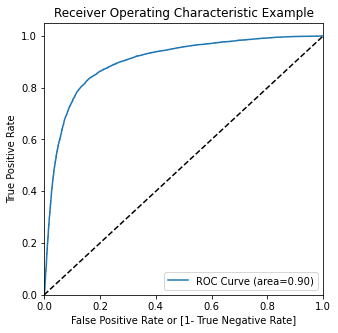

In [392]:
draw_roc(y_train_pred_final.churn,y_train_pred_final.churn_prob)

##### Finding the optimum threshold:

In [393]:
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.churn_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,churn,churn_prob,id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.034599,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.371358,1,0,1,1,1,1,0,0,0,0,0,0
2,0,0.149600,2,0,1,1,0,0,0,0,0,0,0,0
3,0,0.035732,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.025480,4,0,1,0,0,0,0,0,0,0,0,0


In [394]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
num=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    specificity=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.670988     0.975863     0.366113
0.2   0.2  0.742398     0.951410     0.533386
0.3   0.3  0.791963     0.923636     0.660290
0.4   0.4  0.822240     0.885165     0.759315
0.5   0.5  0.836574     0.838472     0.834677
0.6   0.6  0.831752     0.778076     0.885428
0.7   0.7  0.807984     0.696285     0.919684
0.8   0.8  0.763478     0.577233     0.949723
0.9   0.9  0.651910     0.324743     0.979078


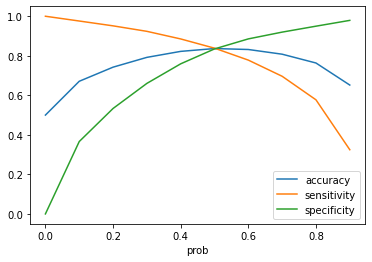

In [395]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.show()

- From the above plot, we can see that a balance between 'accuracy', 'sensitivity' and 'specificity' occurs at probability cutoff of approximately 0.5<br>
- But to have higher recall value or sensitivity to our model, we are opting for cutoff probability as: **0.4**

##### Precision and Recall:

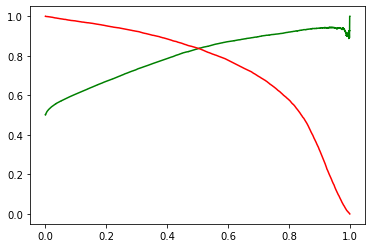

In [396]:
precision_score(y_train_pred_final.churn,y_train_pred_final.predicted)
recall_score(y_train_pred_final.churn,y_train_pred_final.predicted)
p,r,thresholds=precision_recall_curve(y_train_pred_final.churn,y_train_pred_final.churn_prob)
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.show()

##### Making Predictions on Test Set:

In [397]:
X_train_sm1=sm.add_constant(X_train[col3])
X_test=X_test[col3]
X_test_sm=sm.add_constant(X_test)
logreg1=sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial())
res=logreg1.fit()
y_test_pred=res.predict(X_test_sm)
y_test_pred.head()

39713    0.001618
80955    0.996050
80034    0.615110
93911    0.419425
55461    0.201921
dtype: float64

In [398]:
y_pred_1=pd.DataFrame(y_test_pred)
y_test_df=pd.DataFrame(y_test)
y_test_df['id']=y_test_df.index
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()
y_pred_final=y_pred_final.rename(columns={0: 'churn_prob'})
y_pred_final=y_pred_final.reindex(['custid','churn','churn_prob'],axis=1)
y_pred_final.head()
y_pred_final['final_predicted']=y_pred_final.churn_prob.map(lambda x:1 if x>0.4 else 0)
print("The accuracy on test set is: ",round(metrics.accuracy_score(y_pred_final.churn,y_pred_final.final_predicted),2))

The accuracy on test set is:  0.76


In [399]:
# Creating a confusion matrix for test set:
cma2=metrics.confusion_matrix(y_pred_final.churn,y_pred_final.final_predicted)

In [400]:
#True Positives
TP6 = cma2[1,1]
# True Negatives
TN6 = cma2[0,0]
# False Positives
FP6 = cma2[0,1]
# False Negatives
FN6 = cma2[1,0]

In [401]:
print("The Recall or Sensitivity of Logistic Regression model on test data is:", round(TP6/(TP6+FN6),2))
print("The specificity of Logistic Regression model on test data is:", round(TN6/(TN6+FP6),2))
print("The Precision of Logistic Regression model on test data is:", round(TP6/(TP6+FP6),2))

The Recall or Sensitivity of Logistic Regression model on test data is: 0.79
The specificity of Logistic Regression model on test data is: 0.76
The Precision of Logistic Regression model on test data is: 0.26


- From the Logistic Regression model, we can conclude that:
- **Recall or Sensitivity** on train data set for cutoff probability 0.4 is: **88.5 %**
- **Recall or Sensitivity** on test data set for cutoff probability 0.4 is: **79 %**
- Thus our model is with in acceptable limit of performance.

Predictors of Logistic Regression Model are as follows:

In [402]:
pd.DataFrame(col3)

,0
0,arpu_6
1,arpu_8
2,roam_og_mou_8
3,total_ic_mou_7
4,total_rech_num_7
5,total_rech_num_8
6,monthly_2g_8
7,monthly_3g_8
8,rech_num_avg_good_action_diff
9,vol_avg_good_action_diff


#### Suggestions to Business from Logistic Regression Model:

- A negative correlation between churning and 'avrpu_8' i.e., average revenu per user during action phase suggests that, customers whose average revenue per user is less during 'action phase' are more likely to churn. <br> Thus, network company should focus on customers during the 'action phase'.
- A negative correlation between churning and 'total_ic_mou_7' suggests that if a customer spends less usage time in incoming calls, that customer is more likely to churn.<br> It is better to suggest customers lucrative offers who spends less usage time in incoming calls during 'action phase'.
- The network company should focus on customers, who recharge less number of times during 'action phase'.
- The network company should offer discounts or loyalty redeemable points in 'monthly packages' during action phase.
- The network company should give free data vouchers to customers whose data usage falls during 'action phase'.
- It is suggestible to offer discounted 'ISD' calls or points to the customers whose ISD calls fall during 'action phase'.